<a href="https://colab.research.google.com/github/Jaumzinho109/Impactus_Python_Scripts/blob/main/Inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CPI e Afins

In [2]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.ticker as mtick

font_path = r"C:\Users\Joao\Downloads\Montserrat\static\Montserrat-Regular.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = "Arial"
fm.fontManager.addfont(font_path)

fred = Fred(api_key="672d5598c8a41df9397cc5eb92c02d5e")

pc = fred.get_series("SUUR0000SA0L1E")
core_cpi = pd.DataFrame()
core_cpi["Nível de preços do núcleo"] = pd.DataFrame(pc)
core_cpi["Pct Change"] = core_cpi['Nível de preços do núcleo'].pct_change()
core_cpi.index = pd.to_datetime(core_cpi.index)

core_cpi_24 = core_cpi[core_cpi.index.year == 2024]
core_cpi_25 = core_cpi[core_cpi.index.year == 2025]
core_cpi_23 = core_cpi[core_cpi.index.year == 2023]

valores_2024 = core_cpi_24.groupby(core_cpi_24.index.month)["Pct Change"].first()
valores_2025 = core_cpi_25.groupby(core_cpi_25.index.month)["Pct Change"].first()
valores_2023 = core_cpi_23.groupby(core_cpi_23.index.month)["Pct Change"].first()

core_cpi = core_cpi[(core_cpi.index.year >= 2010) & (core_cpi.index.year <= 2019)]

percentil_10 = pd.DataFrame()
percentil_90 = pd.DataFrame()

for mes in range(1, 13):
    dados_mes = core_cpi[core_cpi.index.month == mes]["Pct Change"]
    percentil_10.loc[mes, "Percentil 10"] = dados_mes.quantile(0.10)
    percentil_90.loc[mes, "Percentil 90"] = dados_mes.quantile(0.90)

valores_2024 = []
valores_2025 = []

for mes in range(1, 13):
    valor_24 = core_cpi_24[core_cpi_24.index.month == mes]["Pct Change"].values
    valor_25 = core_cpi_25[core_cpi_25.index.month == mes]["Pct Change"].values
    valores_2024.append(valor_24[0] if len(valor_24) > 0 else None)
    valores_2025.append(valor_25[0] if len(valor_25) > 0 else None)

valores_dos_graficos = pd.DataFrame()
valores_dos_graficos["Percentil 10"] = percentil_10["Percentil 10"]
valores_dos_graficos["Percentil 90"] = percentil_90["Percentil 90"]
valores_dos_graficos["Ano de 2024"] = valores_2024
valores_dos_graficos["Ano de 2025"] = valores_2025
valores_dos_graficos["Ano de 2023"] = valores_2023
valores_dos_graficos["Mediana"] = core_cpi.groupby(core_cpi.index.month)["Pct Change"].median()
valores_dos_graficos.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]



PCE SA - Main

In [3]:
#Este é o core PCE
psa = fred.get_series("PCEPILFE")
core_pce_sa = pd.DataFrame()
core_pce_sa["Pct Change"] = pd.DataFrame(psa).pct_change()
core_pce_sa["Pct Change from a year ago"] = pd.DataFrame(psa).pct_change(periods=12)

#Vou pegar limites 90 e 10
psa = fred.get_series("PCEPILFE")
core_pce_sa = pd.DataFrame()
core_pce_sa["Pct Change"] = pd.DataFrame(psa).pct_change()
core_pce_sa["Pct Change from a year ago"] = pd.DataFrame(psa).pct_change(periods=12)

#Vou pegar limites 90 e 10, valores de 2024 e 2025 e mediana para o pct change
pce_graph_values = core_pce_sa[(core_pce_sa.index.year >= 2010) & (core_pce_sa.index.year <= 2019)]
percentil_10_pctchg = pce_graph_values.groupby(pce_graph_values.index.month)["Pct Change"].quantile(0.10)
percentil_90_pctchg = pce_graph_values.groupby(pce_graph_values.index.month)["Pct Change"].quantile(0.90)
mediana_pctchg = pce_graph_values.groupby(pce_graph_values.index.month)["Pct Change"].median()
pce_pctchg_2024 = core_pce_sa[core_pce_sa.index.year == 2024].groupby(core_pce_sa[core_pce_sa.index.year == 2024].index.month)["Pct Change"].first()
pce_pctchg_2025 = core_pce_sa[core_pce_sa.index.year == 2025].groupby(core_pce_sa[core_pce_sa.index.year == 2025].index.month)["Pct Change"].first()

pce_pctchg = pd.DataFrame({
    "Percentil 10": percentil_10_pctchg,
    "Percentil 90": percentil_90_pctchg,
    "Ano de 2024": pce_pctchg_2024,
    "Ano de 2025": pce_pctchg_2025,
    "Mediana": mediana_pctchg
})

pce_pctchg.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

[]

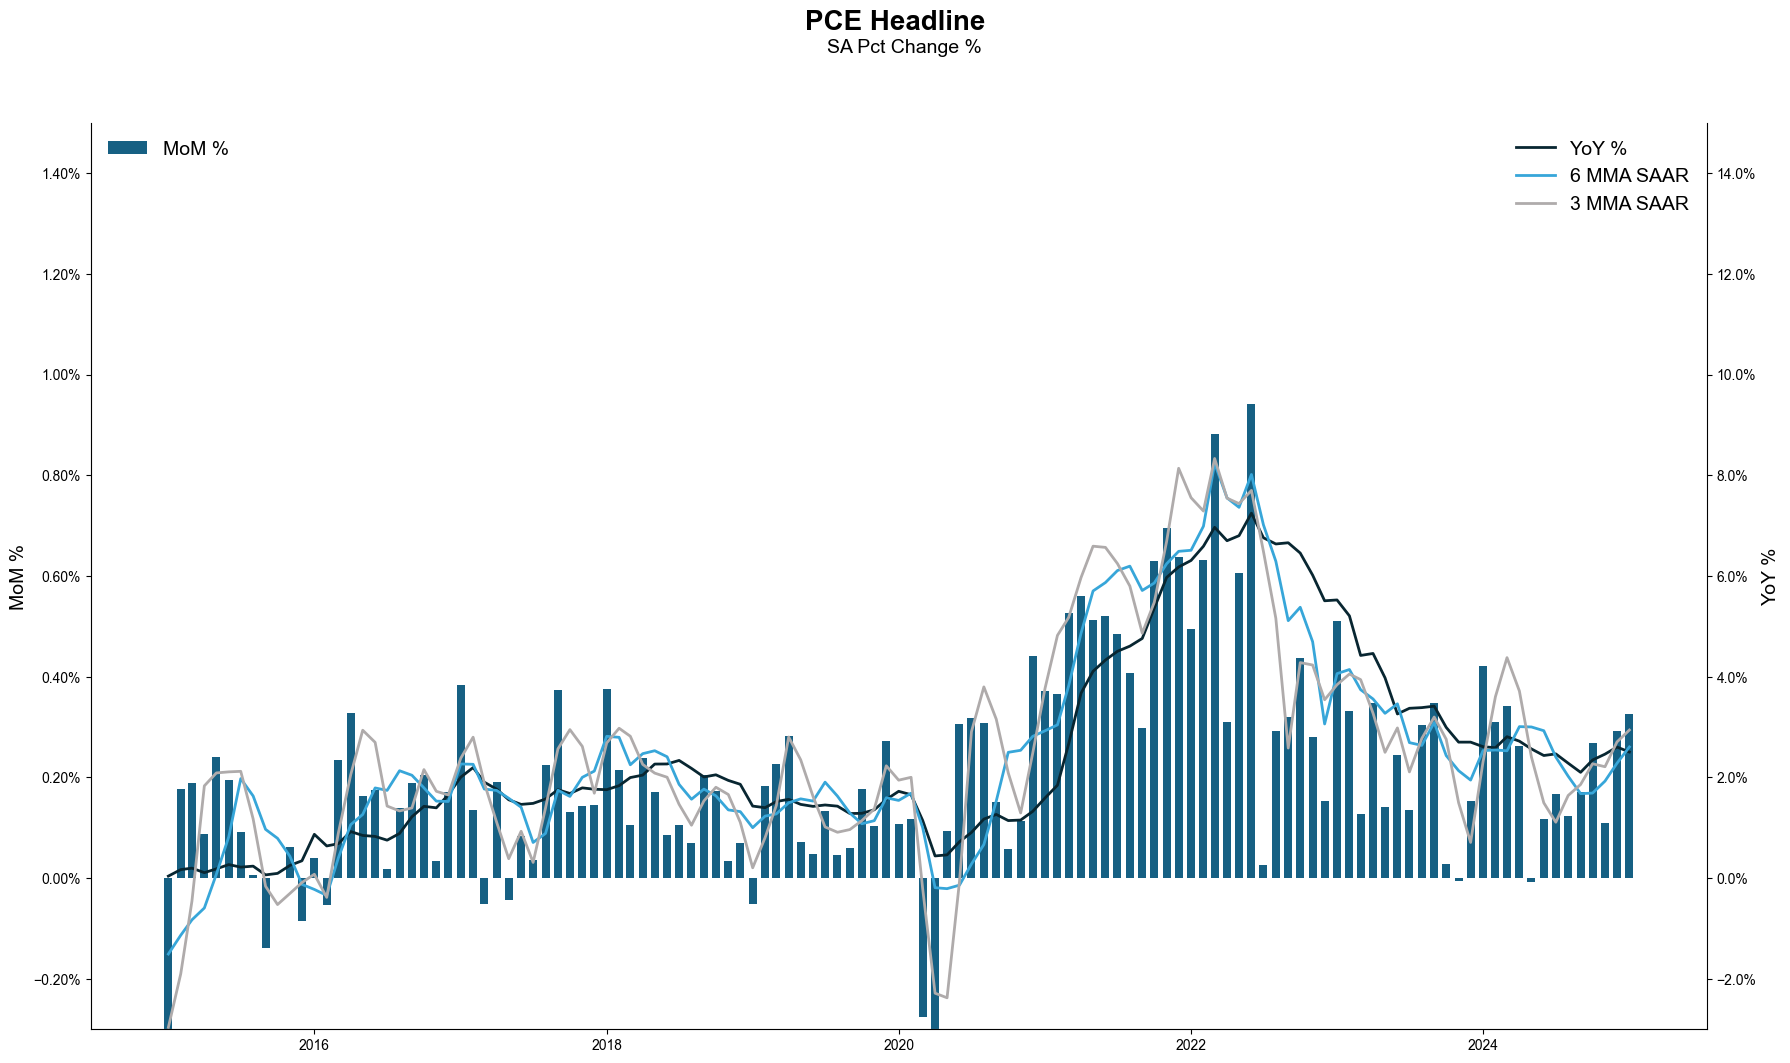

In [4]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from fredapi import Fred

pce_head = fred.get_series("PCEPI")

pce_headline = pd.DataFrame()
pce_headline["Nível de preços"] = pd.DataFrame(pce_head)
pce_headline["Pct Change"] = pce_headline["Nível de preços"].pct_change()
pce_headline["Pct Change from a year ago"] = pce_headline["Nível de preços"].pct_change(periods=12)
pce_headline["3 MMA"] = pce_headline["Pct Change"].rolling(window=3).mean()
pce_headline["6 MMA"] = pce_headline["Pct Change"].rolling(window=6).mean()
pce_headline["3 MMA SAAR"] = (pce_headline["3 MMA"] + 1) ** 12 - 1
pce_headline["6 MMA SAAR"] = (pce_headline["6 MMA"] + 1) ** 12 - 1
pce_headline.index = pd.to_datetime(pce_headline.index)
pce_headline = pce_headline[(pce_headline.index.year >= 2015)]

fig, ax = plt.subplots(figsize=(18, 10.8))
ax2 = ax.twinx()

ax.bar(pce_headline.index, pce_headline["Pct Change"], width=20, color="#166083", label="MoM %")
ax2.plot(pce_headline.index, pce_headline["Pct Change from a year ago"], linewidth=2, color="#082631", label="YoY %")
ax2.plot(pce_headline.index, pce_headline["6 MMA SAAR"], linewidth=2, color="#37A6D9", label="6 MMA SAAR")
ax2.plot(pce_headline.index, pce_headline["3 MMA SAAR"], linewidth=2, color="#AFABAB", label="3 MMA SAAR")

ax.set_ylabel("MoM %", fontsize=14)
ax2.set_ylabel("YoY %", fontsize=14)
ax.set_ylim(-0.003, 0.015)
ax2.set_ylim(-0.03, 0.15)

plt.suptitle("PCE Headline", fontsize=20, fontweight='bold')
plt.text(0.505, 0.94, "SA Pct Change %", fontsize=14, ha='center', transform=plt.gcf().transFigure)

ax.legend(frameon=False, fontsize=14, loc="upper left")
ax2.legend(frameon=False, fontsize=14, loc="upper right")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#d9d9d9")
ax.spines["bottom"].set_color("#d9d9d9")
ax2.spines["top"].set_visible(False)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15)
plt.tight_layout()
plt.plot()



In [5]:
#Agora vou criar o mesmo para pct change from a year ago
pce_graph_values_ya = core_pce_sa[(core_pce_sa.index.year >= 2009)]
mma3 = pce_graph_values_ya["Pct Change from a year ago"].rolling(window=3).mean()
mma12 = pce_graph_values_ya["Pct Change from a year ago"].rolling(window=12).mean()
mma6 = pce_graph_values_ya["Pct Change from a year ago"].rolling(window=6).mean()
mean_10_19 = core_pce_sa[(core_pce_sa.index.year >= 2010) & (core_pce_sa.index.year <= 2019)]["Pct Change from a year ago"].mean()

pce_graph_values_ya["MMA3"] = mma3
pce_graph_values_ya["MMA6"] = mma6
pce_graph_values_ya["MMA12"] = mma12
pce_graph_values_ya["Mean 2010-2019"] = mean_10_19

pce_ya = pd.DataFrame({
    "MMA3": mma3,
    "MMA6": mma6,
    "MMA12": mma12,
    "Mean 2010-2019": mean_10_19
})

pce_ya.dropna(inplace=True)
pce_ya = pce_ya.drop(pce_ya.index[0])
pce_ya

C:\Users\Joao\AppData\Local\Temp\ipykernel_20392\982597725.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pce_graph_values_ya["MMA3"] = mma3
C:\Users\Joao\AppData\Local\Temp\ipykernel_20392\982597725.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pce_graph_values_ya["MMA6"] = mma6
C:\Users\Joao\AppData\Local\Temp\ipykernel_20392\982597725.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

,MMA3,MMA6,MMA12,Mean 2010-2019
2010-01-01,0.015246,0.011983,0.009947,0.015852
2010-02-01,0.016330,0.013729,0.010622,0.015852
2010-03-01,0.017222,0.015482,0.011468,0.015852
2010-04-01,0.016929,0.016087,0.012030,0.015852
2010-05-01,0.016723,0.016526,0.012709,0.015852
...,...,...,...,...
2024-09-01,0.026857,0.027067,0.029094,0.015852
2024-10-01,0.027404,0.026974,0.028584,0.015852
2024-11-01,0.027763,0.027259,0.028264,0.015852
2024-12-01,0.028443,0.027650,0.028122,0.015852


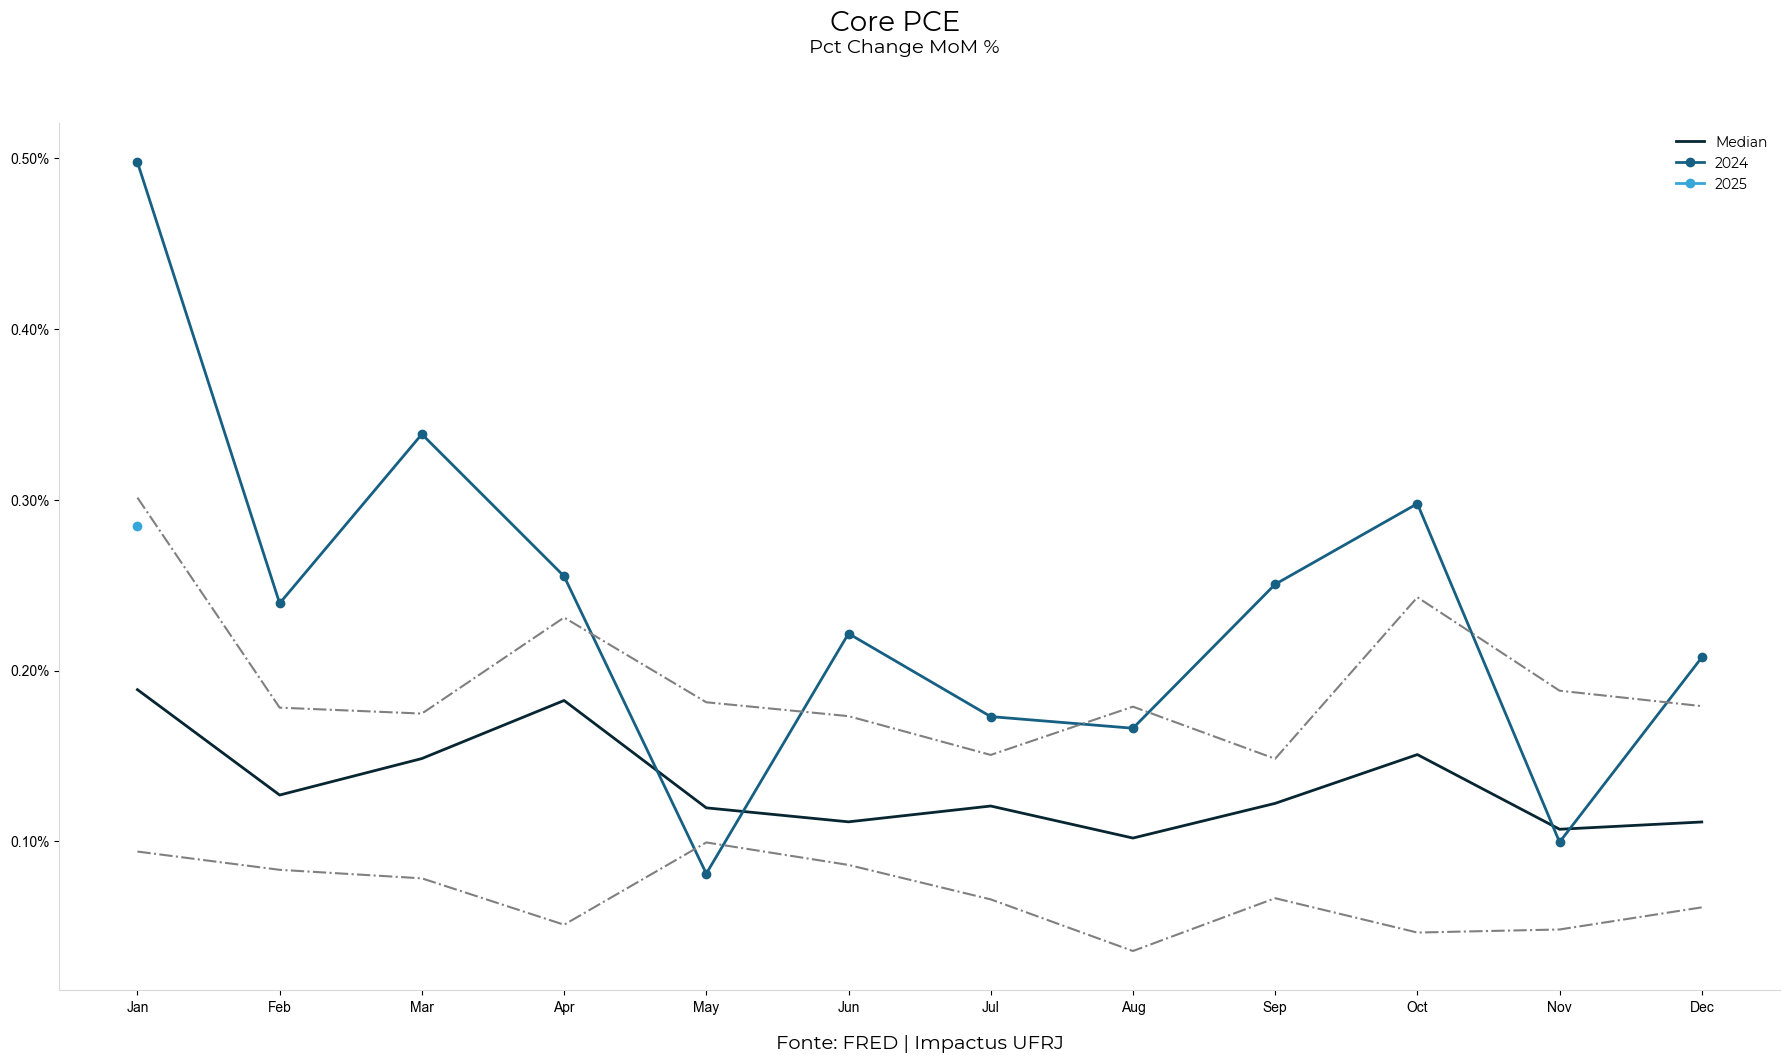

In [6]:
plt.figure(figsize=(18, 10.8))
plt.plot(pce_pctchg.index, pce_pctchg["Mediana"], linewidth=2, color="#082631", label="Median")
plt.plot(pce_pctchg.index, pce_pctchg["Ano de 2024"], marker="o", linewidth=2, color="#166083", label="2024")
plt.plot(pce_pctchg.index, pce_pctchg["Ano de 2025"], marker="o", linewidth=2, color="#37A6D9", label="2025")
plt.plot(pce_pctchg.index, pce_pctchg["Percentil 10"], color="grey", ls= "-.")
plt.plot(pce_pctchg.index, pce_pctchg["Percentil 90"], color="grey", ls= "-.")

plt.suptitle("Core PCE", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "Pct Change MoM %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()


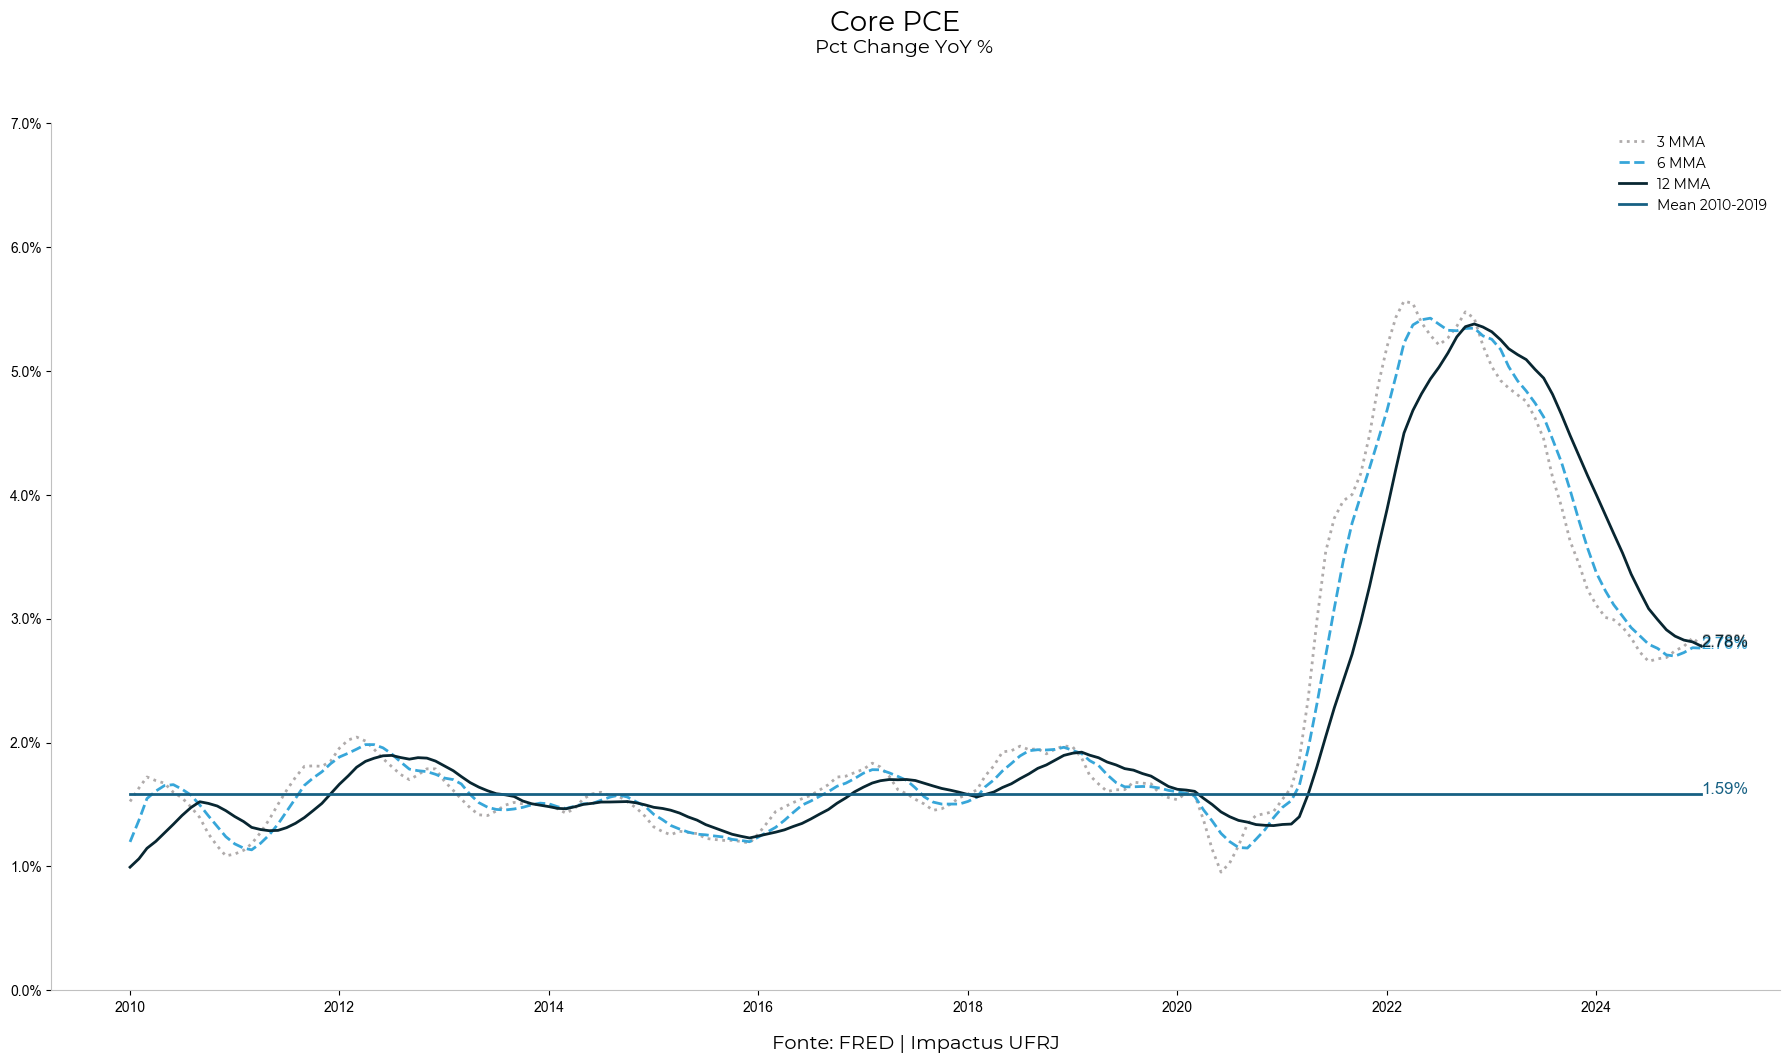

In [7]:
# Cria a figura
plt.figure(figsize=(18, 10.8))

# Plota as linhas
plt.plot(pce_ya.index, pce_ya["MMA3"], linewidth=2, color="#AFABAB", label="3 MMA", ls= ":")
plt.plot(pce_ya.index, pce_ya["MMA6"], linewidth=2, color="#37A6D9", label="6 MMA", ls= "--")
plt.plot(pce_ya.index, pce_ya["MMA12"], linewidth=2, color="#082631", label="12 MMA")
plt.plot(pce_ya.index, pce_ya["Mean 2010-2019"], linewidth=2, color="#166083", label="Mean 2010-2019")

plt.suptitle("Core PCE", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "Pct Change YoY %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#c0c0c0")
plt.gca().spines["bottom"].set_color("#c0c0c0")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.ylim(0, 0.07)

plt.text(pce_ya.index[-1], pce_ya["MMA3"].iloc[-1], f'{pce_ya["MMA3"].iloc[-1]:.2%}', color="#AFABAB", fontsize=12, ha='left')
plt.text(pce_ya.index[-1], pce_ya["MMA6"].iloc[-1], f'{pce_ya["MMA6"].iloc[-1]:.2%}', color="#37A6D9", fontsize=12, ha='left')
plt.text(pce_ya.index[-1], pce_ya["MMA12"].iloc[-1], f'{pce_ya["MMA12"].iloc[-1]:.2%}', color="#082631", fontsize=12, ha='left')
plt.text(pce_ya.index[-1], pce_ya["Mean 2010-2019"].iloc[-1], f'{pce_ya["Mean 2010-2019"].iloc[-1]:.2%}', color="#166083", fontsize=12, ha='left')

plt.tight_layout()
plt.show()

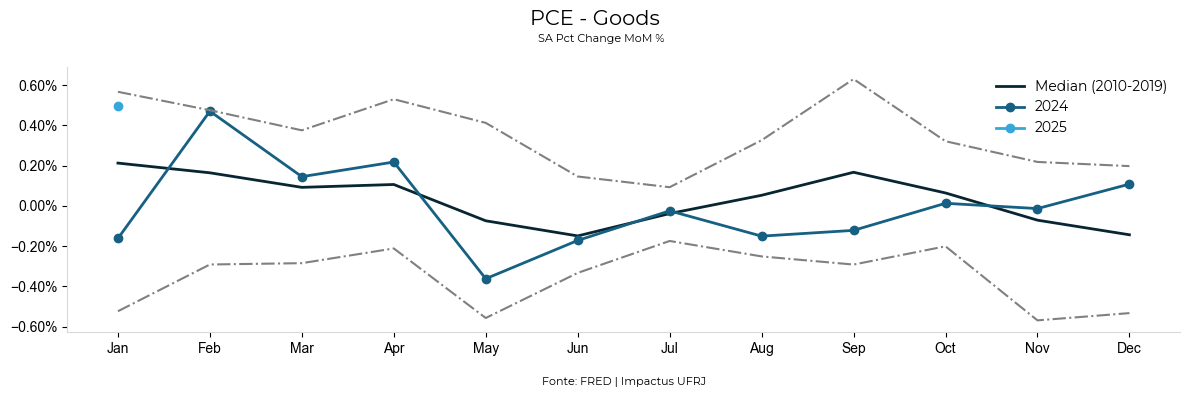

In [21]:
# Core PCE - Goods
goods = fred.get_series("DGDSRG3M086SBEA")
core_pce_goods = pd.DataFrame()
core_pce_goods["Pct Change"] = pd.DataFrame(goods).pct_change()
core_pce_goods["Pct Change from a year ago"] = pd.DataFrame(goods).pct_change(periods=12)

#Vou pegar limites 90 e 10
pce_goods = core_pce_goods[(core_pce_goods.index.year >= 2010) & (core_pce_goods.index.year <= 2019)]
percentil_10_pctchg_goods = pce_goods.groupby(pce_goods.index.month)["Pct Change"].quantile(0.10)
percentil_90_pctchg_goods = pce_goods.groupby(pce_goods.index.month)["Pct Change"].quantile(0.90)
mediana_pctchg_goods = pce_goods.groupby(pce_goods.index.month)["Pct Change"].median()
pce_pctchg_2024_goods = core_pce_goods[core_pce_goods.index.year == 2024].groupby(core_pce_goods[core_pce_goods.index.year == 2024].index.month)["Pct Change"].first()
pce_pctchg_2025_goods = core_pce_goods[core_pce_goods.index.year == 2025].groupby(core_pce_goods[core_pce_goods.index.year == 2025].index.month)["Pct Change"].first()

goods_graph_values = pd.DataFrame({
    "Percentil 10": percentil_10_pctchg_goods,
    "Percentil 90": percentil_90_pctchg_goods,
    "Ano de 2024": pce_pctchg_2024_goods,
    "Ano de 2025": pce_pctchg_2025_goods,
    "Mediana": mediana_pctchg_goods
})

goods_graph_values.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
goods_graph_values


plt.figure(figsize=(12,4))
plt.plot(goods_graph_values.index, goods_graph_values["Mediana"], linewidth=2, color="#082631", label="Median (2010-2019)")
plt.plot(goods_graph_values.index, goods_graph_values["Ano de 2024"], marker="o", linewidth=2, color="#166083", label="2024")
plt.plot(goods_graph_values.index, goods_graph_values["Ano de 2025"], marker="o", linewidth=2, color="#37A6D9", label="2025")
plt.plot(goods_graph_values.index, goods_graph_values["Percentil 10"], color="grey", ls= "-.")
plt.plot(goods_graph_values.index, goods_graph_values["Percentil 90"], color="grey", ls= "-.")
plt.suptitle("PCE - Goods", fontsize=15, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.9, "SA Pct Change MoM %", fontsize=8, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=8, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=8, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

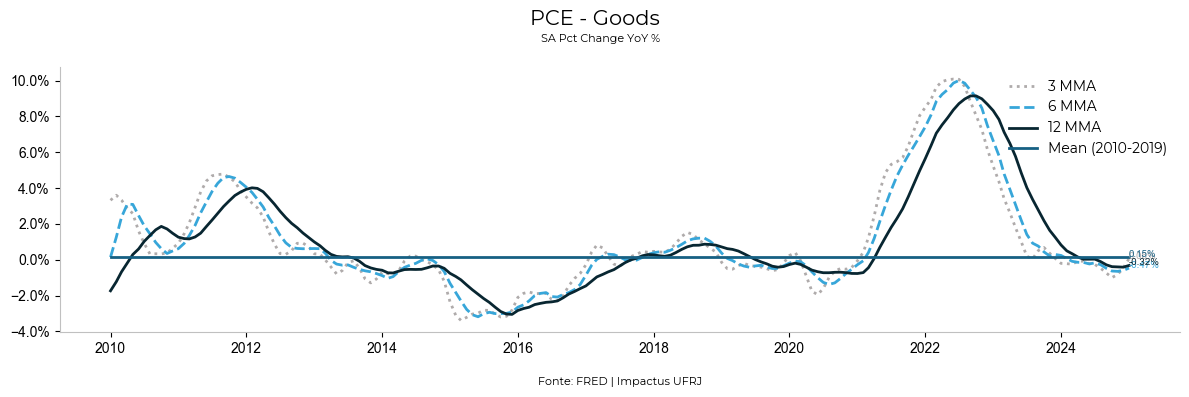

In [22]:
# agora dados from a year ago
goods_graph_values_ya = core_pce_goods[(core_pce_goods.index.year >= 2009)]
mma3_goods = goods_graph_values_ya["Pct Change from a year ago"].rolling(window=3).mean()
mma12_goods = goods_graph_values_ya["Pct Change from a year ago"].rolling(window=12).mean()
mma6_goods = goods_graph_values_ya["Pct Change from a year ago"].rolling(window=6).mean()
mean_10_19_goods = core_pce_goods[(core_pce_goods.index.year >= 2010) & (core_pce_goods.index.year <= 2019)]["Pct Change from a year ago"].mean()

goods_ya = pd.DataFrame({
    "MMA3": mma3_goods,
    "MMA6": mma6_goods,
    "MMA12": mma12_goods,
    "Mean 2010-2019": mean_10_19_goods
})

goods_ya.dropna(inplace=True)
goods_ya = goods_ya.drop(goods_ya.index[0])

plt.figure(figsize=(12,4))
plt.plot(goods_ya.index, goods_ya["MMA3"], linewidth=2, color="#AFABAB", label="3 MMA", ls= ":")
plt.plot(goods_ya.index, goods_ya["MMA6"], linewidth=2, color="#37A6D9", label="6 MMA", ls= "--")
plt.plot(goods_ya.index, goods_ya["MMA12"], linewidth=2, color="#082631", label="12 MMA")
plt.plot(goods_ya.index, goods_ya["Mean 2010-2019"], linewidth=2, color="#166083", label="Mean (2010-2019)")

plt.suptitle("PCE - Goods", fontsize=15, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.9, "SA Pct Change YoY %", fontsize=8, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=8, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#c0c0c0")
plt.gca().spines["bottom"].set_color("#c0c0c0")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.text(goods_ya.index[-1], goods_ya["MMA3"].iloc[-1], f'{goods_ya["MMA3"].iloc[-1]:.2%}', color="#AFABAB", fontsize=7, ha='left')
plt.text(goods_ya.index[-1], goods_ya["MMA6"].iloc[-1], f'{goods_ya["MMA6"].iloc[-1]:.2%}', color="#37A6D9", fontsize=7, ha='left')
plt.text(goods_ya.index[-1], goods_ya["MMA12"].iloc[-1], f'{goods_ya["MMA12"].iloc[-1]:.2%}', color="#082631", fontsize=7, ha='left')
plt.text(goods_ya.index[-1], goods_ya["Mean 2010-2019"].iloc[-1], f'{goods_ya["Mean 2010-2019"].iloc[-1]:.2%}', color="#166083", fontsize=7, ha='left')

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=8, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

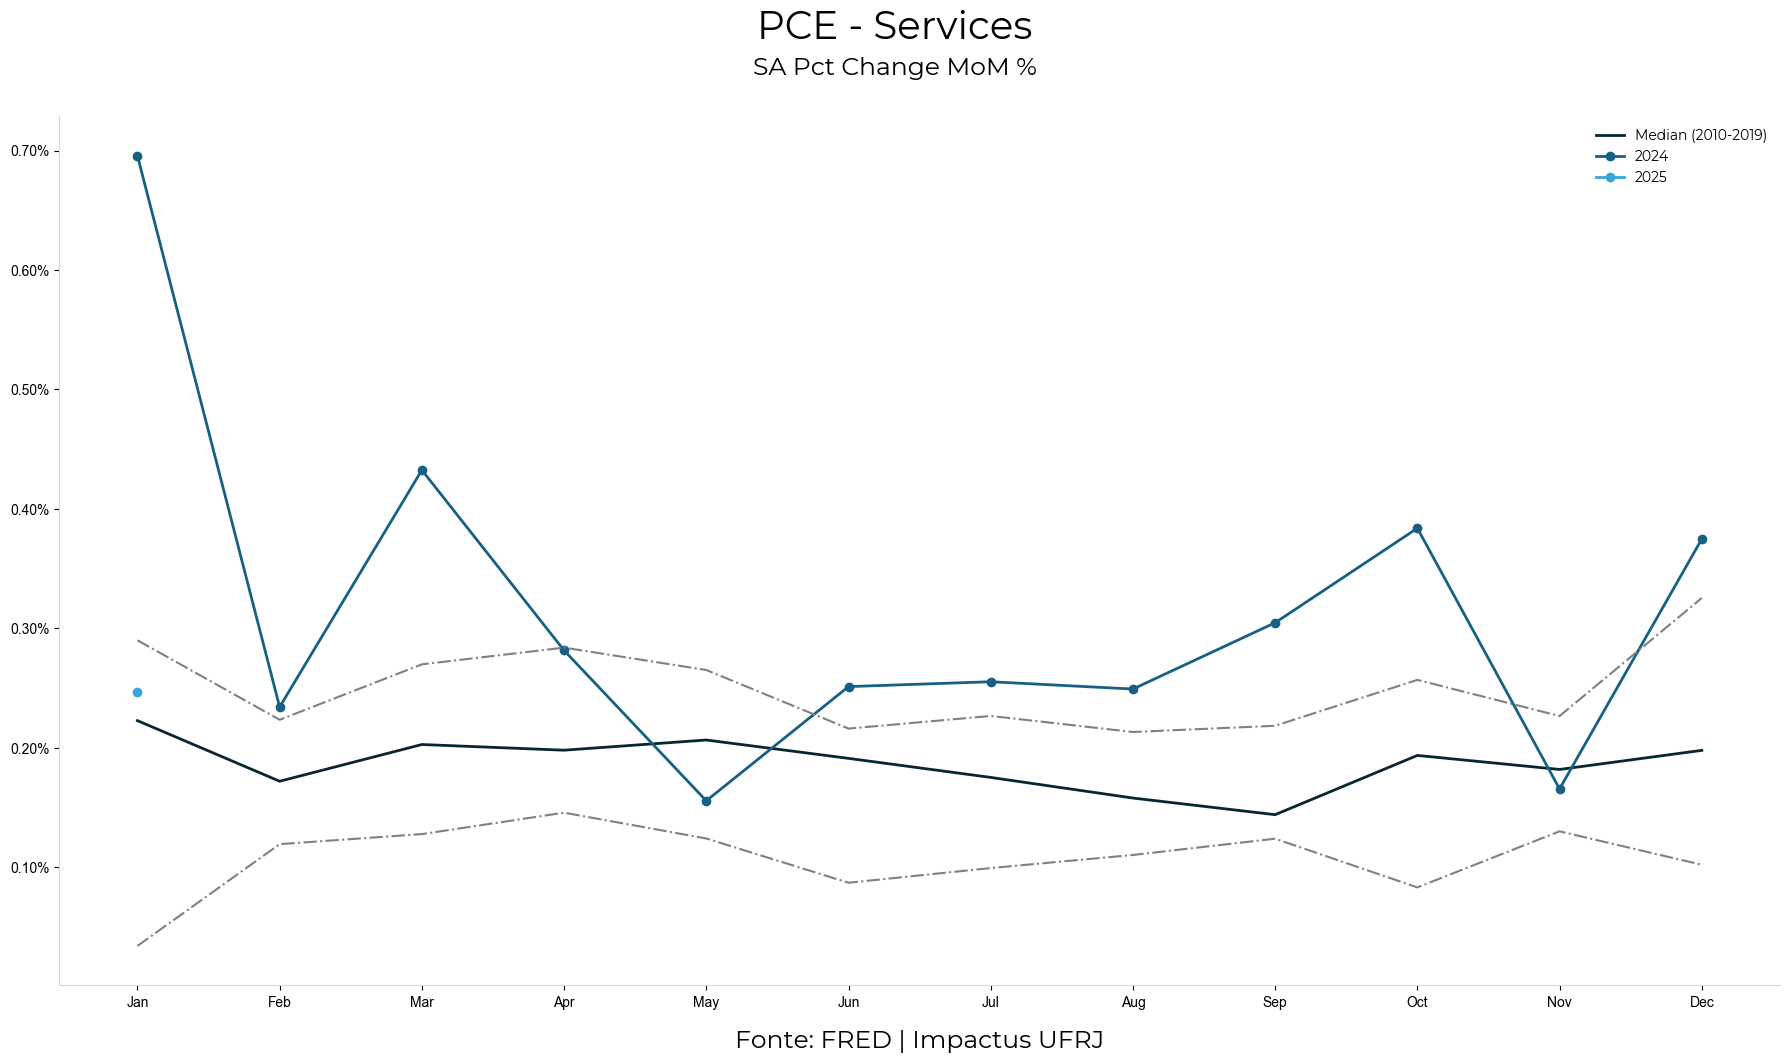

In [10]:
# agora serviços

services = fred.get_series("DSERRG3M086SBEA")
core_pce_services = pd.DataFrame()
core_pce_services["Pct Change"] = pd.DataFrame(services).pct_change()
core_pce_services["Pct Change from a year ago"] = pd.DataFrame(services).pct_change(periods=12)

#Vou pegar limites 90 e 10
pce_services = core_pce_services[(core_pce_services.index.year >= 2010) & (core_pce_services.index.year <= 2019)]
percentil_10_pctchg_services = pce_services.groupby(pce_services.index.month)["Pct Change"].quantile(0.10)
percentil_90_pctchg_services = pce_services.groupby(pce_services.index.month)["Pct Change"].quantile(0.90)
mediana_pctchg_services = pce_services.groupby(pce_services.index.month)["Pct Change"].median()
pce_pctchg_2024_services = core_pce_services[core_pce_services.index.year == 2024].groupby(core_pce_services[core_pce_services.index.year == 2024].index.month)["Pct Change"].first()
pce_pctchg_2025_services = core_pce_services[core_pce_services.index.year == 2025].groupby(core_pce_services[core_pce_services.index.year == 2025].index.month)["Pct Change"].first()

services_graph_values = pd.DataFrame({
    "Percentil 10": percentil_10_pctchg_services,
    "Percentil 90": percentil_90_pctchg_services,
    "Ano de 2024": pce_pctchg_2024_services,
    "Ano de 2025": pce_pctchg_2025_services,
    "Mediana": mediana_pctchg_services
})

services_graph_values.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(18, 10.8))
plt.plot(services_graph_values.index, services_graph_values["Mediana"], linewidth=2, color="#082631", label="Median (2010-2019)")
plt.plot(services_graph_values.index, services_graph_values["Ano de 2024"], marker="o", linewidth=2, color="#166083", label="2024")
plt.plot(services_graph_values.index, services_graph_values["Ano de 2025"], marker="o", linewidth=2, color="#37A6D9", label="2025")
plt.plot(services_graph_values.index, services_graph_values["Percentil 10"], color="grey", ls= "-.")
plt.plot(services_graph_values.index, services_graph_values["Percentil 90"], color="grey", ls= "-.")
plt.suptitle("PCE - Services", fontsize=28, fontweight='bold', fontproperties=font_prop)
plt.text(0.500, 0.92, "SA Pct Change MoM %", fontsize=18, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=18, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=18, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

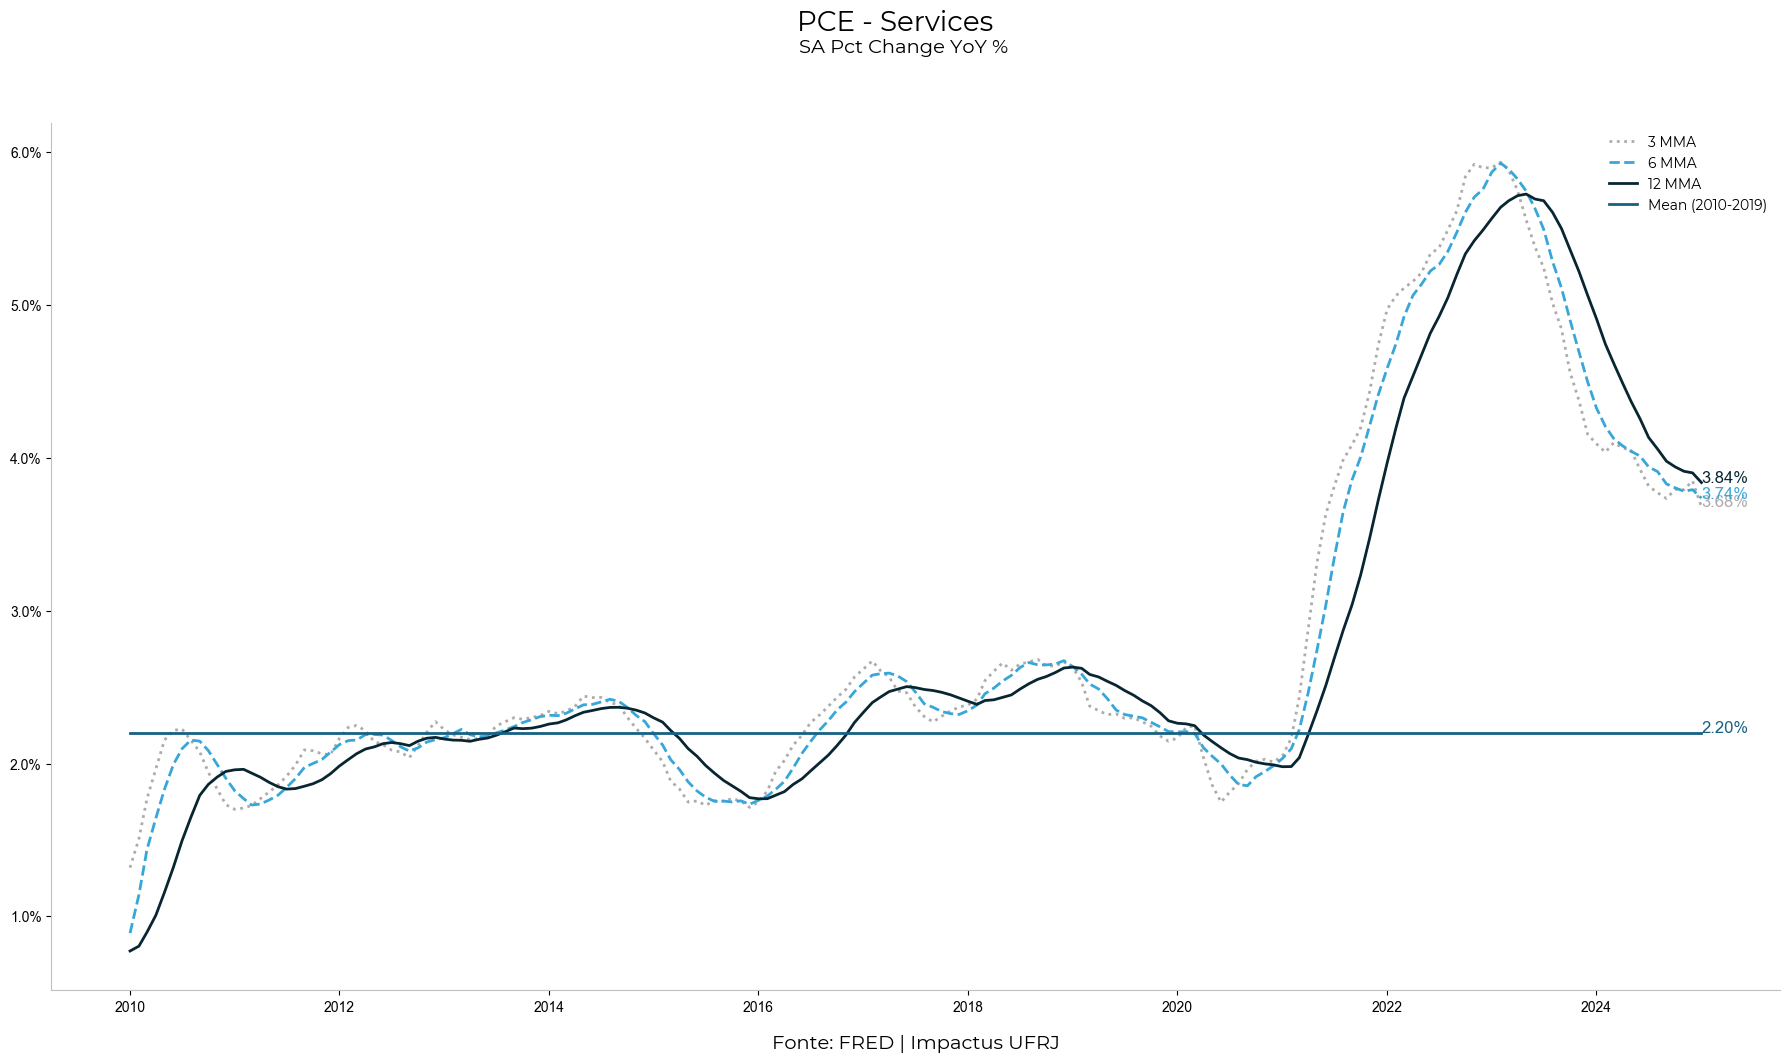

In [11]:
# agora dados from a year ago
services_graph_values_ya = core_pce_services[(core_pce_services.index.year >= 2009)]
mma3_services = services_graph_values_ya["Pct Change from a year ago"].rolling(window=3).mean()
mma12_services = services_graph_values_ya["Pct Change from a year ago"].rolling(window=12).mean()
mma6_services = services_graph_values_ya["Pct Change from a year ago"].rolling(window=6).mean()
mean_10_19_services = core_pce_services[(core_pce_services.index.year >= 2010) & (core_pce_services.index.year <= 2019)]["Pct Change from a year ago"].mean()

services_ya = pd.DataFrame({
    "MMA3": mma3_services,
    "MMA6": mma6_services,
    "MMA12": mma12_services,
    "Mean 2010-2019": mean_10_19_services
})

services_ya.dropna(inplace=True)
services_ya = services_ya.drop(services_ya.index[0])

plt.figure(figsize=(18, 10.8))
plt.plot(services_ya.index, services_ya["MMA3"], linewidth=2, color="#AFABAB", label="3 MMA", ls= ":")
plt.plot(services_ya.index, services_ya["MMA6"], linewidth=2, color="#37A6D9", label="6 MMA", ls= "--")
plt.plot(services_ya.index, services_ya["MMA12"], linewidth=2, color="#082631", label="12 MMA")
plt.plot(services_ya.index, services_ya["Mean 2010-2019"], linewidth=2, color="#166083", label="Mean (2010-2019)")

plt.suptitle("PCE - Services", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "SA Pct Change YoY %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#c0c0c0")
plt.gca().spines["bottom"].set_color("#c0c0c0")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.text(services_ya.index[-1], services_ya["MMA3"].iloc[-1], f'{services_ya["MMA3"].iloc[-1]:.2%}', color="#AFABAB", fontsize=12, ha='left')
plt.text(services_ya.index[-1], services_ya["MMA6"].iloc[-1], f'{services_ya["MMA6"].iloc[-1]:.2%}', color="#37A6D9", fontsize=12, ha='left')
plt.text(services_ya.index[-1], services_ya["MMA12"].iloc[-1], f'{services_ya["MMA12"].iloc[-1]:.2%}', color="#082631", fontsize=12, ha='left')
plt.text(services_ya.index[-1], services_ya["Mean 2010-2019"].iloc[-1], f'{services_ya["Mean 2010-2019"].iloc[-1]:.2%}', color="#166083", fontsize=12, ha='left')

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

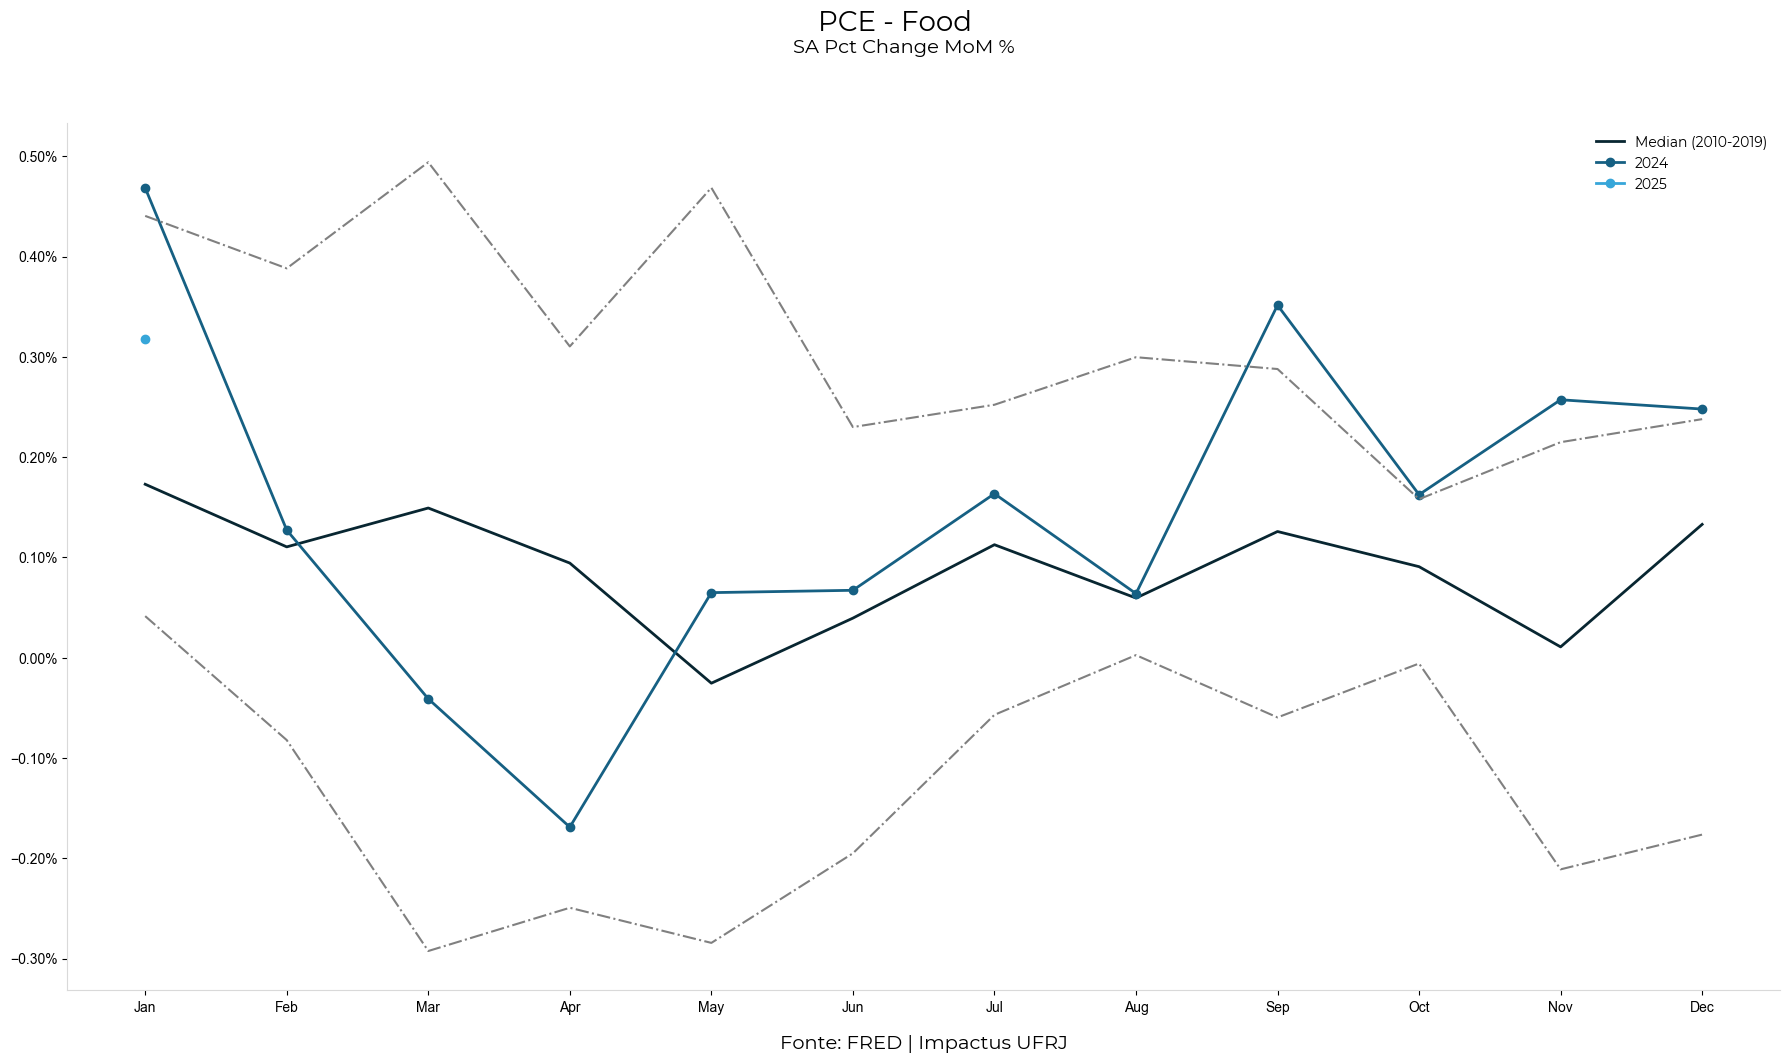

In [12]:
#comida
food = fred.get_series("DFXARG3M086SBEA")
pce_food = pd.DataFrame()
pce_food["Pct Change"] = pd.DataFrame(food).pct_change()
pce_food["Pct Change from a year ago"] = pd.DataFrame(food).pct_change(periods=12)
food_graph_values_ya = pce_food[(pce_food.index.year >= 2009)]
#Vou pegar limites 90 e 10
pce_pctchg_2024_food = pce_food[pce_food.index.year == 2024].groupby(pce_food[pce_food.index.year == 2024].index.month)["Pct Change"].first()
pce_pctchg_2025_food = pce_food[pce_food.index.year == 2025].groupby(pce_food[pce_food.index.year == 2025].index.month)["Pct Change"].first()
pce_food = pce_food[(pce_food.index.year >= 2010) & (pce_food.index.year <= 2019)]
percentil_10_pctchg_food = pce_food.groupby(pce_food.index.month)["Pct Change"].quantile(0.10)
percentil_90_pctchg_food = pce_food.groupby(pce_food.index.month)["Pct Change"].quantile(0.90)
mediana_pctchg_food = pce_food.groupby(pce_food.index.month)["Pct Change"].median()

food_graph_values = pd.DataFrame({
    "Percentil 10": percentil_10_pctchg_food,
    "Percentil 90": percentil_90_pctchg_food,
    "Ano de 2024": pce_pctchg_2024_food,
    "Ano de 2025": pce_pctchg_2025_food,
    "Mediana": mediana_pctchg_food
})

food_graph_values.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(18, 10.8))

plt.plot(food_graph_values.index, food_graph_values["Mediana"], linewidth=2, color="#082631", label="Median (2010-2019)")
plt.plot(food_graph_values.index, food_graph_values["Ano de 2024"], marker="o", linewidth=2, color="#166083", label="2024")
plt.plot(food_graph_values.index, food_graph_values["Ano de 2025"], marker="o", linewidth=2, color="#37A6D9", label="2025")
plt.plot(food_graph_values.index, food_graph_values["Percentil 10"], color="grey", ls= "-.")
plt.plot(food_graph_values.index, food_graph_values["Percentil 90"], color="grey", ls= "-.")
plt.suptitle("PCE - Food", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "SA Pct Change MoM %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

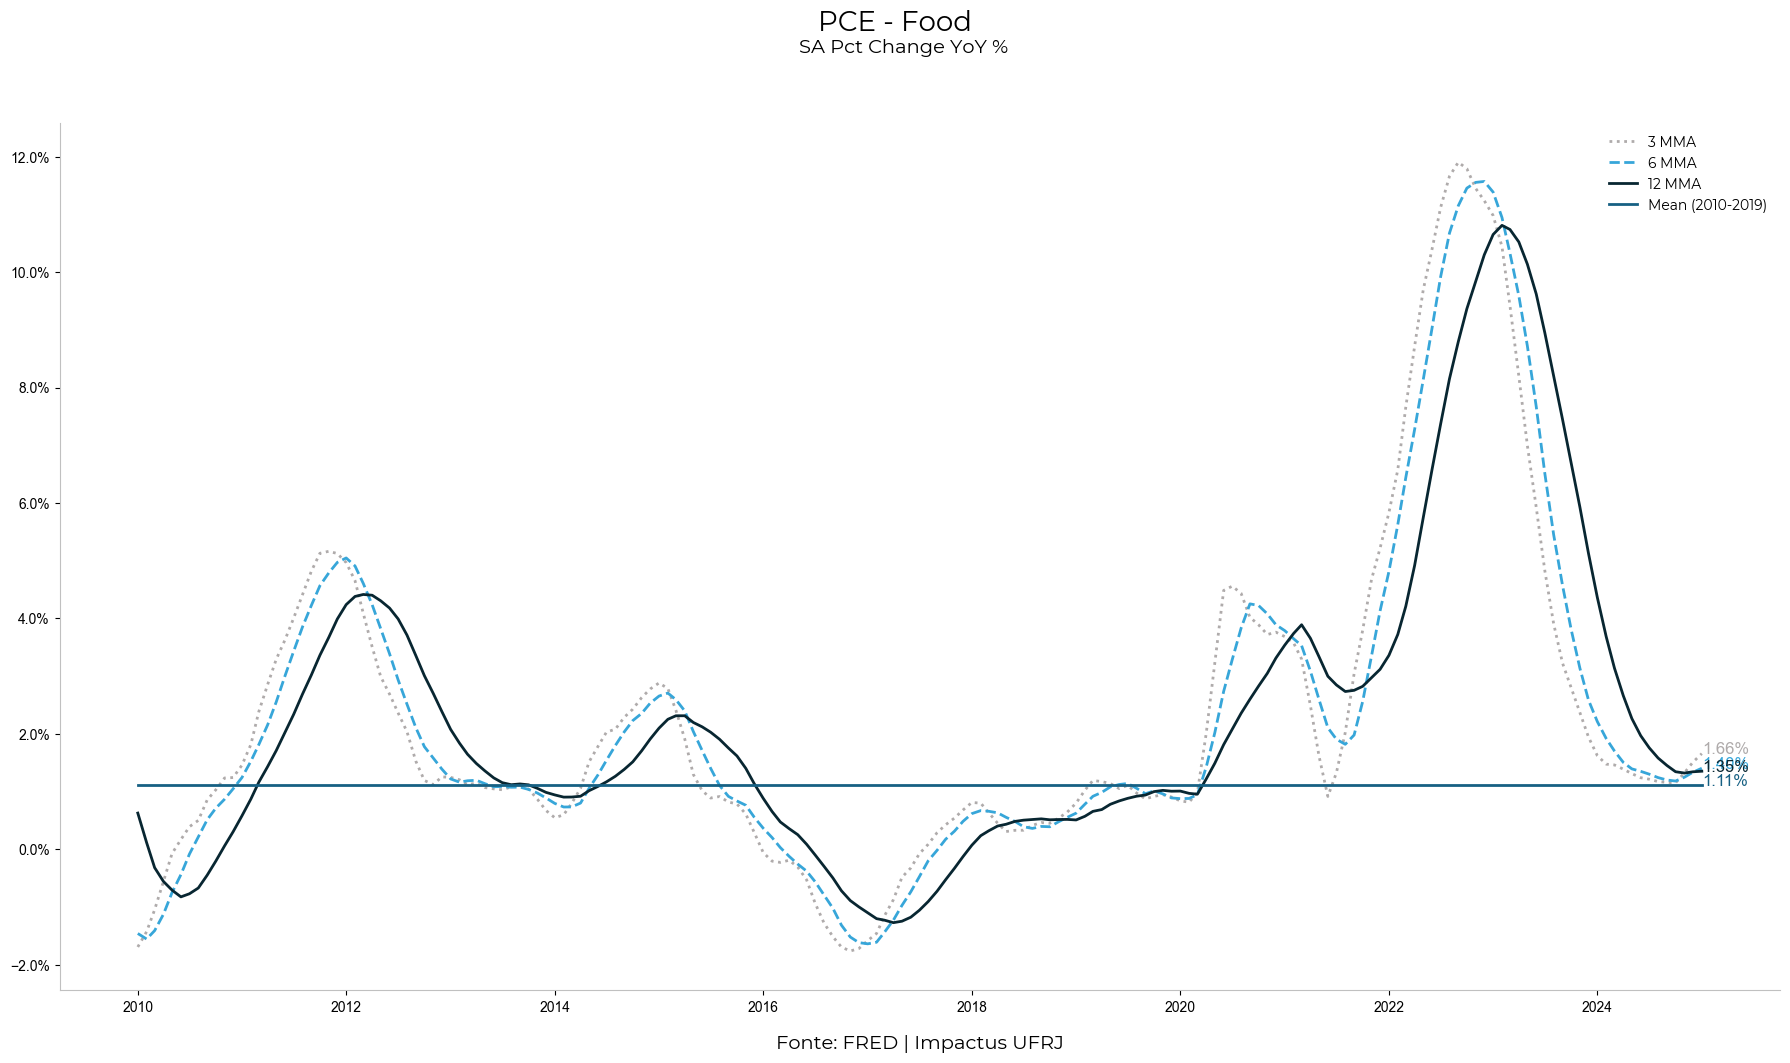

In [13]:
#agora comida yoy
mma3_food = food_graph_values_ya["Pct Change from a year ago"].rolling(window=3).mean()
mma12_food = food_graph_values_ya["Pct Change from a year ago"].rolling(window=12).mean()
mma6_food = food_graph_values_ya["Pct Change from a year ago"].rolling(window=6).mean()
mean_10_19_food = pce_food[(pce_food.index.year >= 2010) & (pce_food.index.year <= 2019)]["Pct Change from a year ago"].mean()

food_ya = pd.DataFrame({
    "MMA3": mma3_food,
    "MMA6": mma6_food,
    "MMA12": mma12_food,
    "Mean 2010-2019": mean_10_19_food
})

food_ya.dropna(inplace=True)
food_ya = food_ya.drop(food_ya.index[0])

plt.figure(figsize=(18, 10.8))
plt.plot(food_ya.index, food_ya["MMA3"], linewidth=2, color="#AFABAB", label="3 MMA", ls= ":")
plt.plot(food_ya.index, food_ya["MMA6"], linewidth=2, color="#37A6D9", label="6 MMA", ls= "--")
plt.plot(food_ya.index, food_ya["MMA12"], linewidth=2, color="#082631", label="12 MMA")
plt.plot(food_ya.index, food_ya["Mean 2010-2019"], linewidth=2, color="#166083", label="Mean (2010-2019)")

plt.suptitle("PCE - Food", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "SA Pct Change YoY %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#c0c0c0")
plt.gca().spines["bottom"].set_color("#c0c0c0")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.text(food_ya.index[-1], food_ya["MMA3"].iloc[-1], f'{food_ya["MMA3"].iloc[-1]:.2%}', color="#AFABAB", fontsize=12, ha='left')
plt.text(food_ya.index[-1], food_ya["MMA6"].iloc[-1], f'{food_ya["MMA6"].iloc[-1]:.2%}', color="#37A6D9", fontsize=12, ha='left')
plt.text(food_ya.index[-1], food_ya["MMA12"].iloc[-1], f'{food_ya["MMA12"].iloc[-1]:.2%}', color="#082631", fontsize=12, ha='left')
plt.text(food_ya.index[-1], food_ya["Mean 2010-2019"].iloc[-1], f'{food_ya["Mean 2010-2019"].iloc[-1]:.2%}', color="#166083", fontsize=12, ha='left')

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

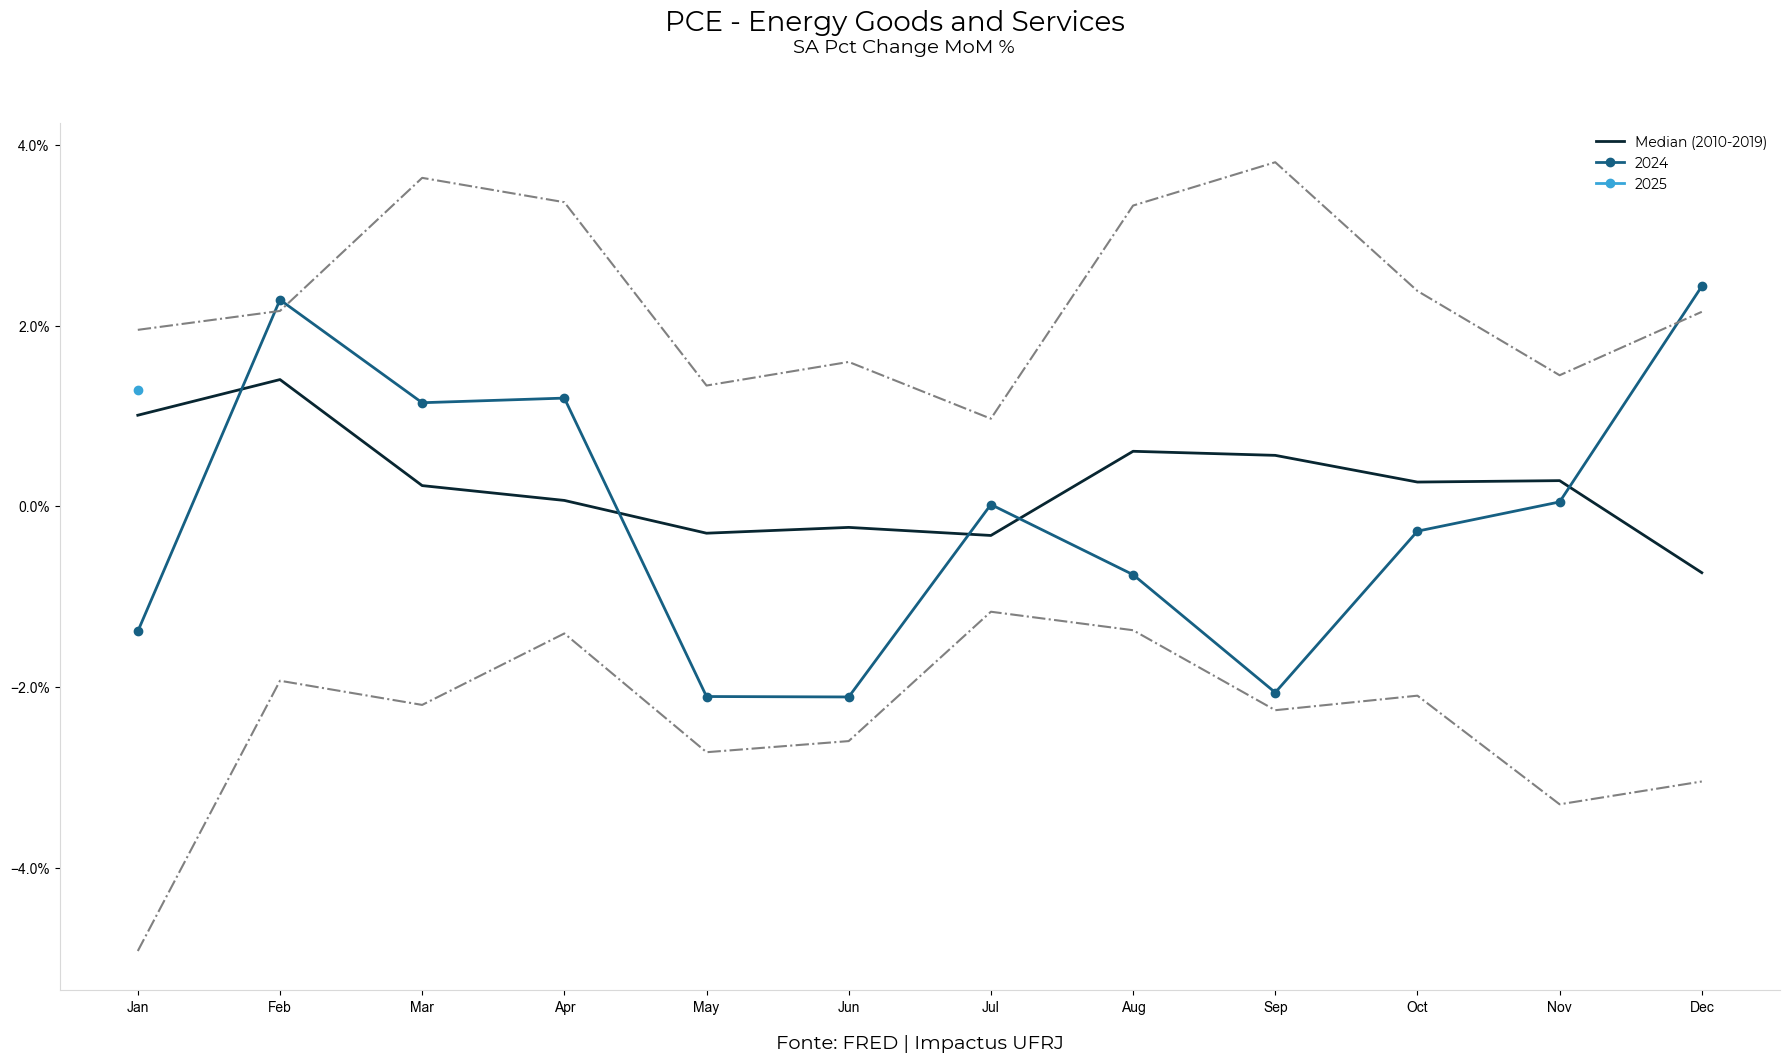

In [14]:
#energy goods and services
energy = fred.get_series("DNRGRG3M086SBEA")
pce_energy = pd.DataFrame()
pce_energy["Pct Change"] = pd.DataFrame(energy).pct_change()
pce_energy["Pct Change from a year ago"] = pd.DataFrame(energy).pct_change(periods=12)
energy_graph_values_ya = pce_energy[(pce_energy.index.year >= 2009)]
#Vou pegar limites 90 e 10

pce_pctchg_2024_energy = pce_energy[pce_energy.index.year == 2024].groupby(pce_energy[pce_energy.index.year == 2024].index.month)["Pct Change"].first()
pce_pctchg_2025_energy = pce_energy[pce_energy.index.year == 2025].groupby(pce_energy[pce_energy.index.year == 2025].index.month)["Pct Change"].first()
pce_energy = pce_energy[(pce_energy.index.year >= 2010) & (pce_energy.index.year <= 2019)]
percentil_10_pctchg_energy = pce_energy.groupby(pce_energy.index.month)["Pct Change"].quantile(0.10)
percentil_90_pctchg_energy = pce_energy.groupby(pce_energy.index.month)["Pct Change"].quantile(0.90)
mediana_pctchg_energy = pce_energy.groupby(pce_energy.index.month)["Pct Change"].median()

energy_graph_values = pd.DataFrame({
    "Percentil 10": percentil_10_pctchg_energy,
    "Percentil 90": percentil_90_pctchg_energy,
    "Ano de 2024": pce_pctchg_2024_energy,
    "Ano de 2025": pce_pctchg_2025_energy,
    "Mediana": mediana_pctchg_energy
})

energy_graph_values.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(18, 10.8))

plt.plot(energy_graph_values.index, energy_graph_values["Mediana"], linewidth=2, color="#082631", label="Median (2010-2019)")
plt.plot(energy_graph_values.index, energy_graph_values["Ano de 2024"], marker="o", linewidth=2, color="#166083", label="2024")
plt.plot(energy_graph_values.index, energy_graph_values["Ano de 2025"], marker="o", linewidth=2, color="#37A6D9", label="2025")
plt.plot(energy_graph_values.index, energy_graph_values["Percentil 10"], color="grey", ls= "-.")
plt.plot(energy_graph_values.index, energy_graph_values["Percentil 90"], color="grey", ls= "-.")
plt.suptitle("PCE - Energy Goods and Services", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "SA Pct Change MoM %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

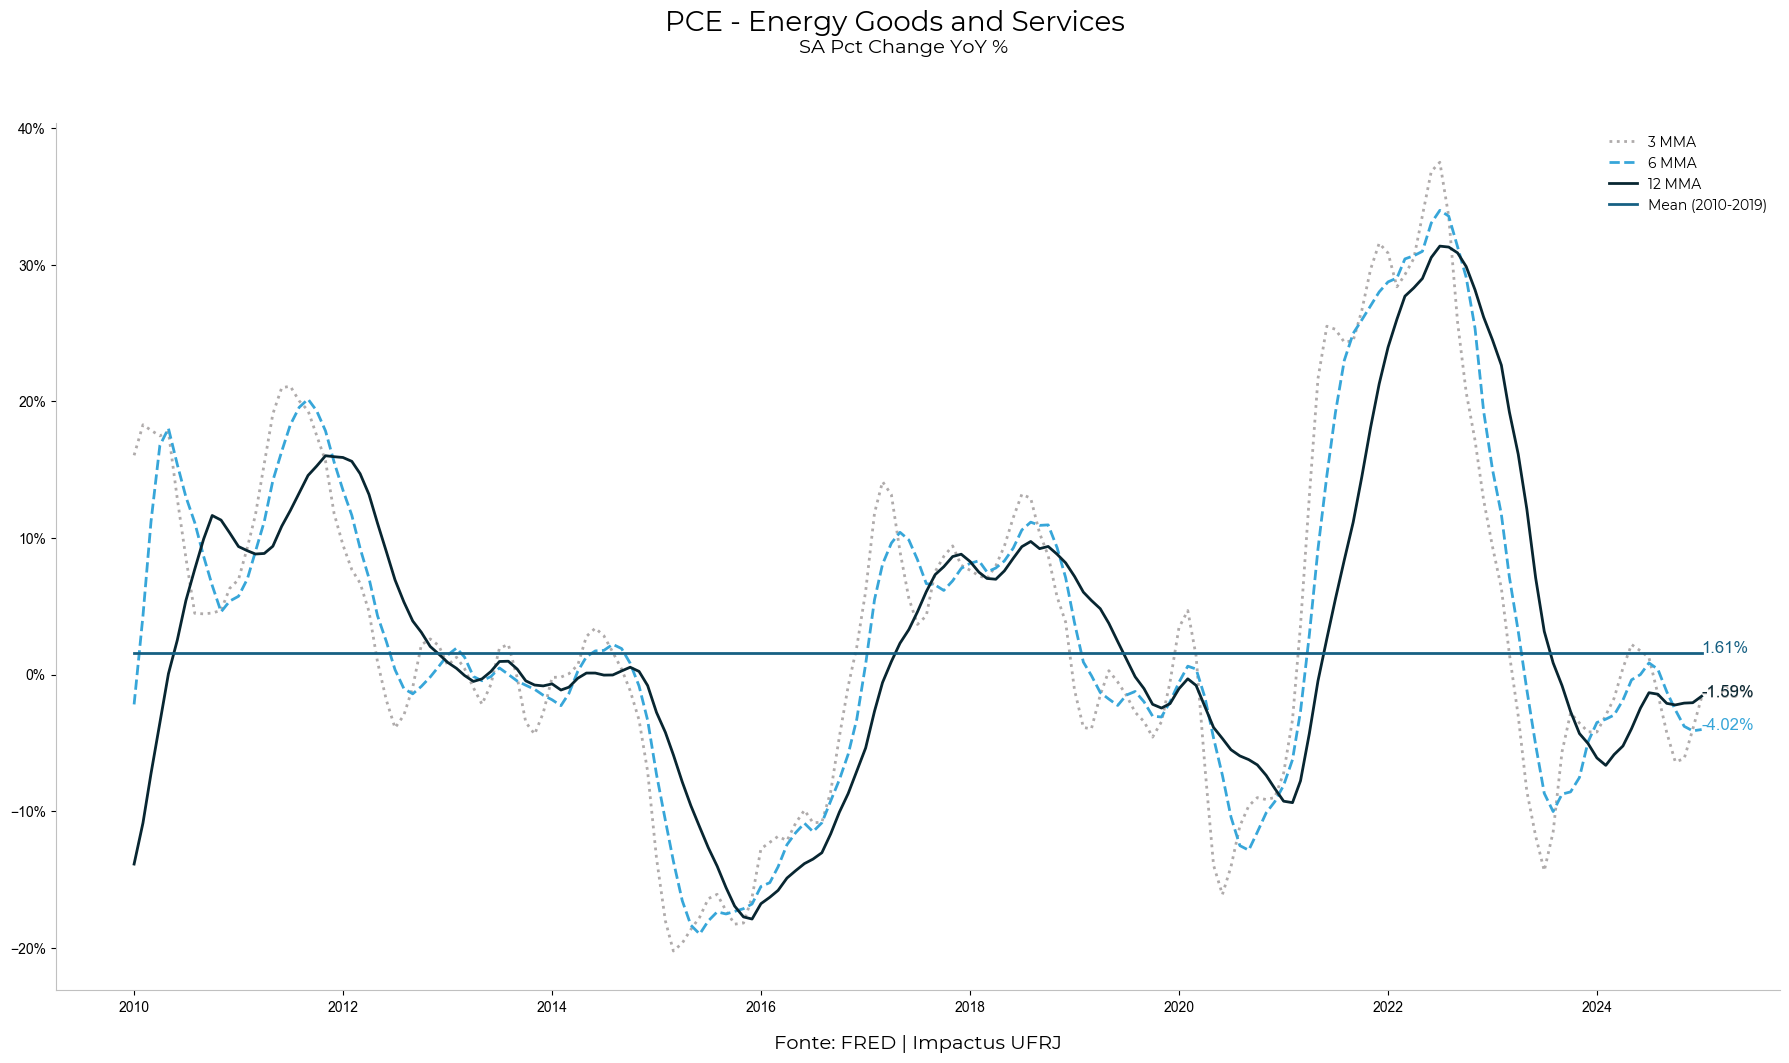

In [15]:
# Agora yoy de energia
mma3_energy = energy_graph_values_ya["Pct Change from a year ago"].rolling(window=3).mean()
mma12_energy = energy_graph_values_ya["Pct Change from a year ago"].rolling(window=12).mean()
mma6_energy = energy_graph_values_ya["Pct Change from a year ago"].rolling(window=6).mean()
mean_10_19_energy = pce_energy[(pce_energy.index.year >= 2010) & (pce_energy.index.year <= 2019)]["Pct Change from a year ago"].mean()

energy_ya = pd.DataFrame({
    "MMA3": mma3_energy,
    "MMA6": mma6_energy,
    "MMA12": mma12_energy,
    "Mean 2010-2019": mean_10_19_energy
})

energy_ya.dropna(inplace=True)
energy_ya = energy_ya.drop(energy_ya.index[0])

plt.figure(figsize=(18, 10.8))

plt.plot(energy_ya.index, energy_ya["MMA3"], linewidth=2, color="#AFABAB", label="3 MMA", ls= ":")
plt.plot(energy_ya.index, energy_ya["MMA6"], linewidth=2, color="#37A6D9", label="6 MMA", ls= "--")
plt.plot(energy_ya.index, energy_ya["MMA12"], linewidth=2, color="#082631", label="12 MMA")
plt.plot(energy_ya.index, energy_ya["Mean 2010-2019"], linewidth=2, color="#166083", label="Mean (2010-2019)")

plt.suptitle("PCE - Energy Goods and Services", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "SA Pct Change YoY %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#c0c0c0")
plt.gca().spines["bottom"].set_color("#c0c0c0")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.text(energy_ya.index[-1], energy_ya["MMA3"].iloc[-1], f'{energy_ya["MMA3"].iloc[-1]:.2%}', color="#AFABAB", fontsize=12, ha='left')
plt.text(energy_ya.index[-1], energy_ya["MMA6"].iloc[-1], f'{energy_ya["MMA6"].iloc[-1]:.2%}', color="#37A6D9", fontsize=12, ha='left')
plt.text(energy_ya.index[-1], energy_ya["MMA12"].iloc[-1], f'{energy_ya["MMA12"].iloc[-1]:.2%}', color="#082631", fontsize=12, ha='left')
plt.text(energy_ya.index[-1], energy_ya["Mean 2010-2019"].iloc[-1], f'{energy_ya["Mean 2010-2019"].iloc[-1]:.2%}', color="#166083", fontsize=12, ha='left')

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

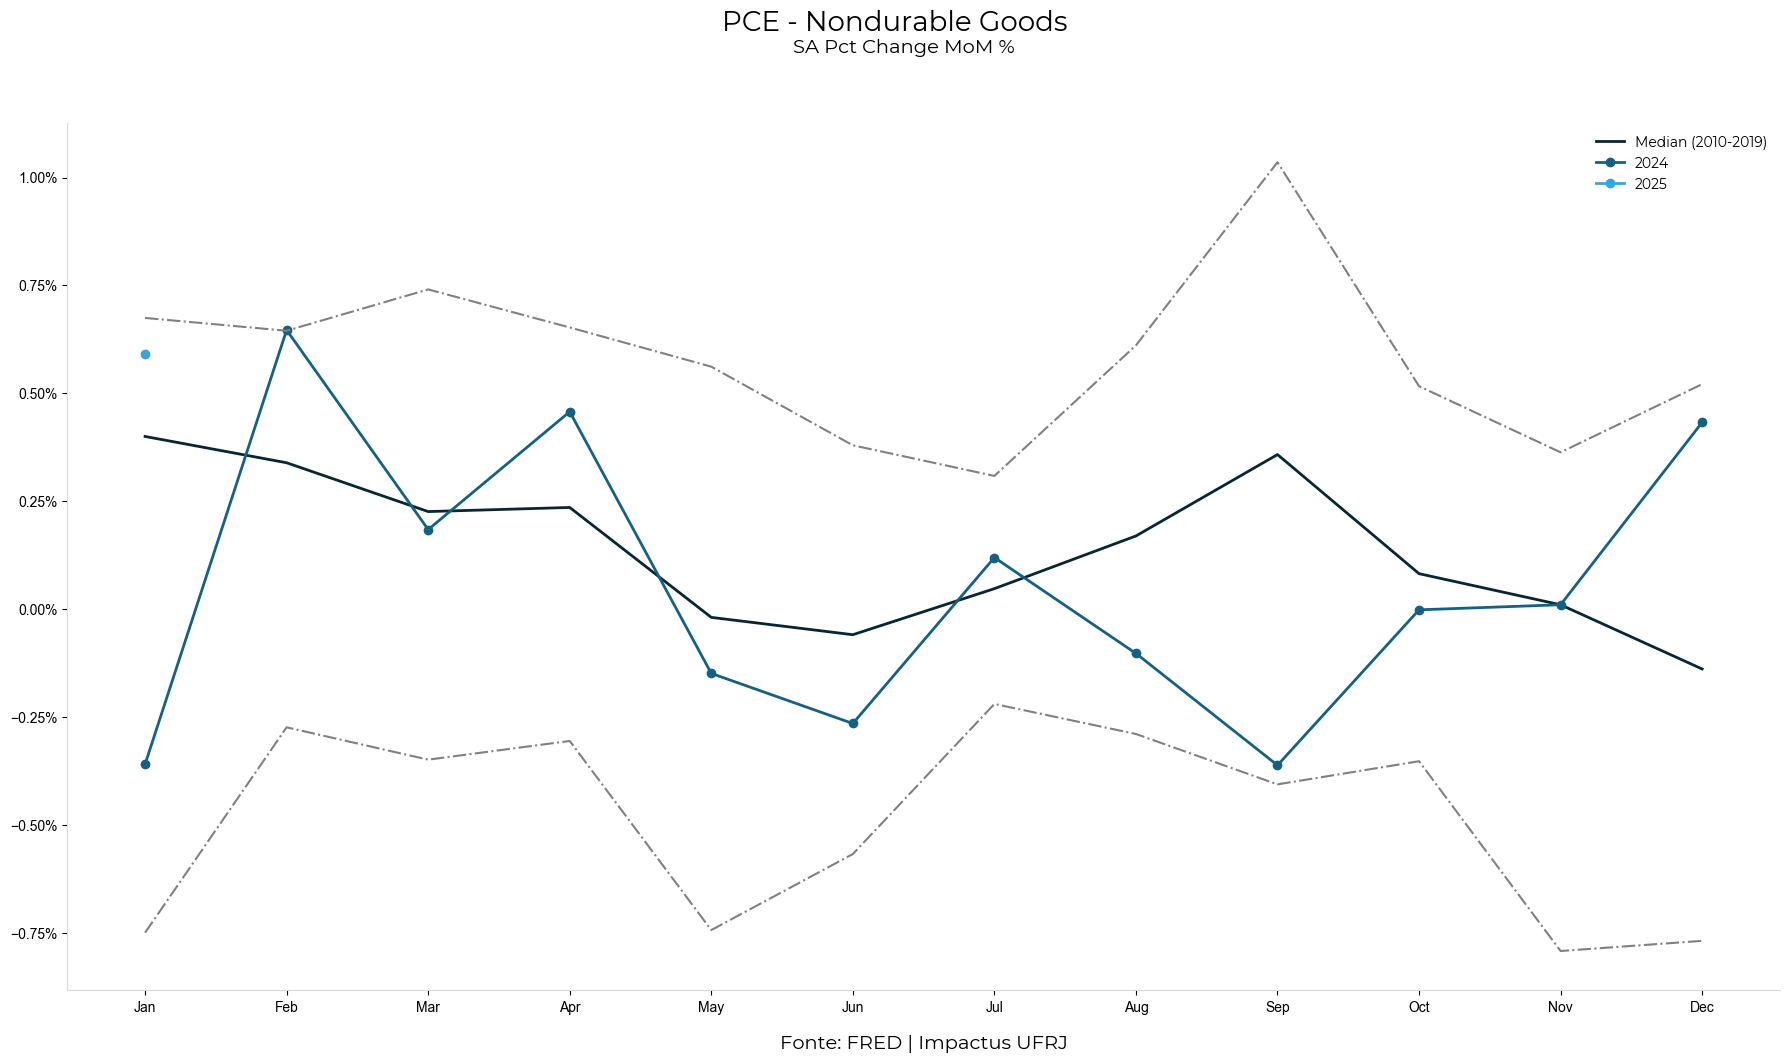

In [16]:
# nondurable goods

nondurable = fred.get_series("DNDGRG3M086SBEA")
pce_nondurable = pd.DataFrame()
pce_nondurable["Pct Change"] = pd.DataFrame(nondurable).pct_change()
pce_nondurable["Pct Change from a year ago"] = pd.DataFrame(nondurable).pct_change(periods=12)
nondurable_graph_values_ya = pce_nondurable[(pce_nondurable.index.year >= 2009)]

#Vou pegar limites 90 e 10
pce_pctchg_2024_nondurable = pce_nondurable[pce_nondurable.index.year == 2024].groupby(pce_nondurable[pce_nondurable.index.year == 2024].index.month)["Pct Change"].first()
pce_pctchg_2025_nondurable = pce_nondurable[pce_nondurable.index.year == 2025].groupby(pce_nondurable[pce_nondurable.index.year == 2025].index.month)["Pct Change"].first()
pce_nondurable = pce_nondurable[(pce_nondurable.index.year >= 2010) & (pce_nondurable.index.year <= 2019)]
percentil_10_pctchg_nondurable = pce_nondurable.groupby(pce_nondurable.index.month)["Pct Change"].quantile(0.10)
percentil_90_pctchg_nondurable = pce_nondurable.groupby(pce_nondurable.index.month)["Pct Change"].quantile(0.90)
mediana_pctchg_nondurable = pce_nondurable.groupby(pce_nondurable.index.month)["Pct Change"].median()

nondurable_graph_values = pd.DataFrame({
    "Percentil 10": percentil_10_pctchg_nondurable,
    "Percentil 90": percentil_90_pctchg_nondurable,
    "Ano de 2024": pce_pctchg_2024_nondurable,
    "Ano de 2025": pce_pctchg_2025_nondurable,
    "Mediana": mediana_pctchg_nondurable
})

nondurable_graph_values.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(18, 10.8))

plt.plot(nondurable_graph_values.index, nondurable_graph_values["Mediana"], linewidth=2, color="#082631", label="Median (2010-2019)")
plt.plot(nondurable_graph_values.index, nondurable_graph_values["Ano de 2024"], marker="o", linewidth=2, color="#166083", label="2024")
plt.plot(nondurable_graph_values.index, nondurable_graph_values["Ano de 2025"], marker="o", linewidth=2, color="#37A6D9", label="2025")
plt.plot(nondurable_graph_values.index, nondurable_graph_values["Percentil 10"], color="grey", ls= "-.")
plt.plot(nondurable_graph_values.index, nondurable_graph_values["Percentil 90"], color="grey", ls= "-.")
plt.suptitle("PCE - Nondurable Goods", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "SA Pct Change MoM %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

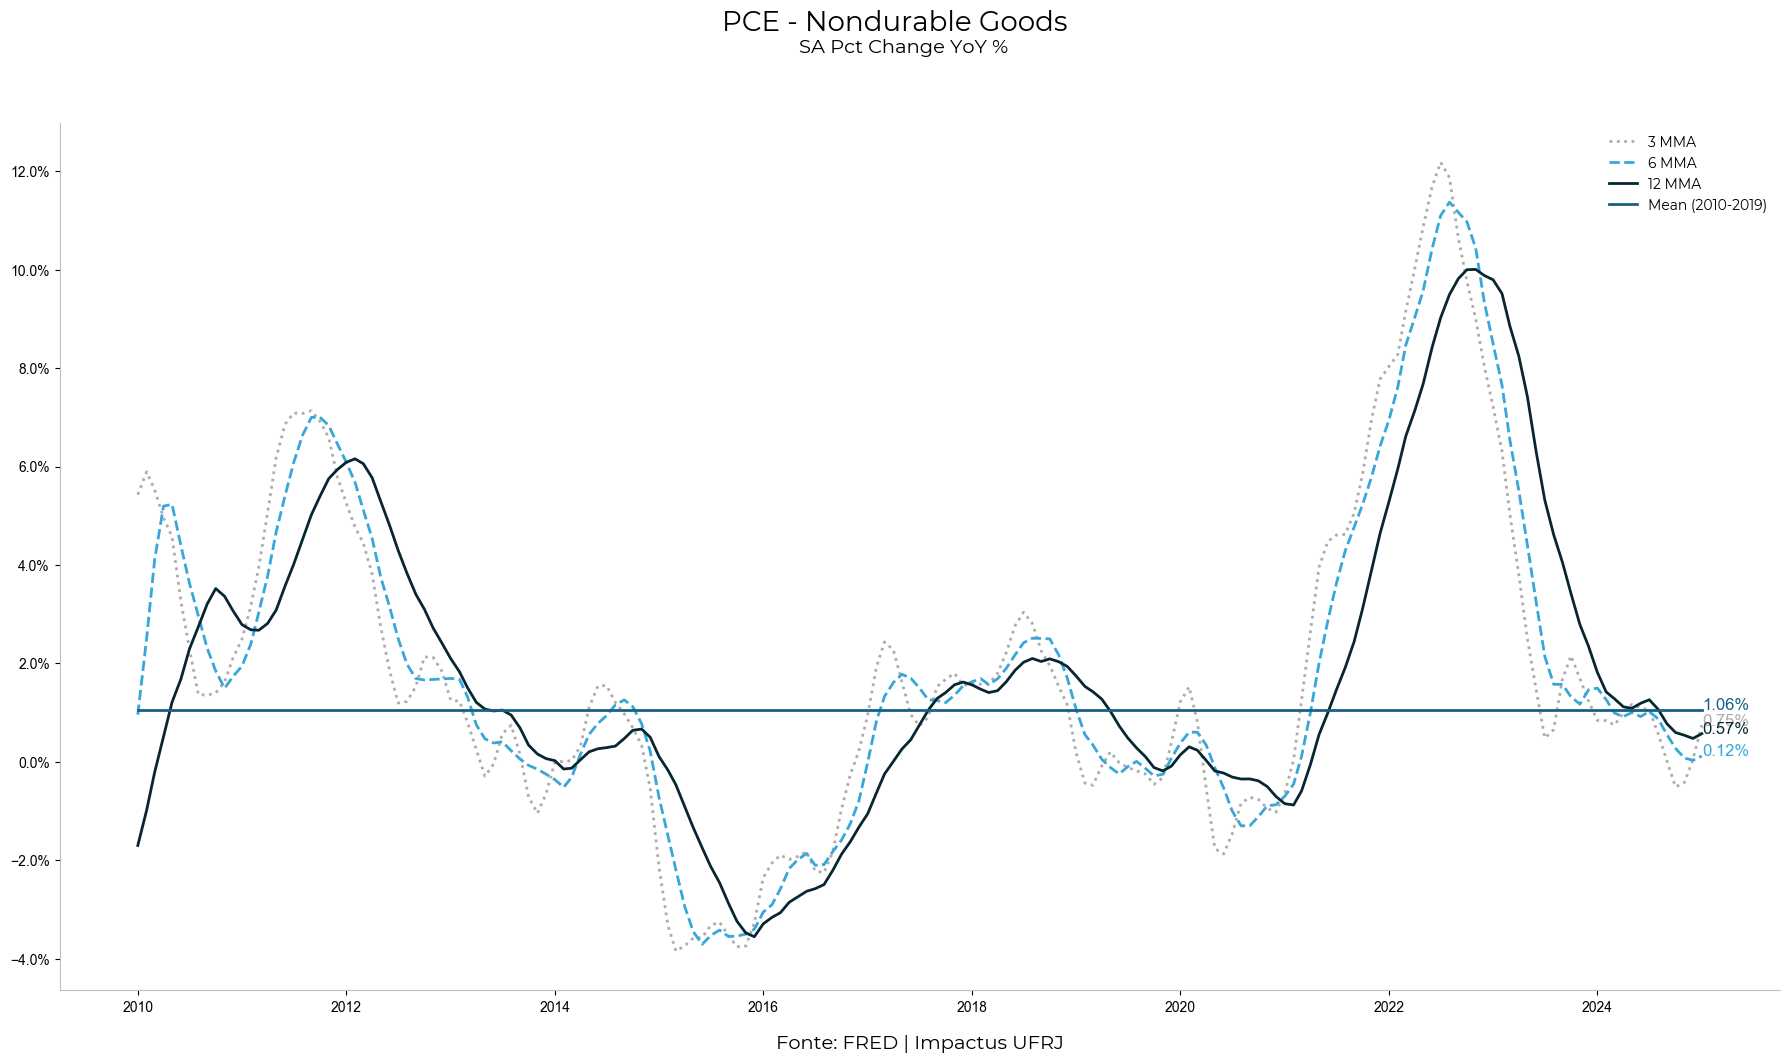

In [17]:
# agora nondurable yoy

mma3_nondurable = nondurable_graph_values_ya["Pct Change from a year ago"].rolling(window=3).mean()
mma12_nondurable = nondurable_graph_values_ya["Pct Change from a year ago"].rolling(window=12).mean()
mma6_nondurable = nondurable_graph_values_ya["Pct Change from a year ago"].rolling(window=6).mean()
mean_10_19_nondurable = pce_nondurable[(pce_nondurable.index.year >= 2010) & (pce_nondurable.index.year <= 2019)]["Pct Change from a year ago"].mean()

nondurable_ya = pd.DataFrame({
    "MMA3": mma3_nondurable,
    "MMA6": mma6_nondurable,
    "MMA12": mma12_nondurable,
    "Mean 2010-2019": mean_10_19_nondurable
})

nondurable_ya.dropna(inplace=True)
nondurable_ya = nondurable_ya.drop(nondurable_ya.index[0])

plt.figure(figsize=(18, 10.8))

plt.plot(nondurable_ya.index, nondurable_ya["MMA3"], linewidth=2, color="#AFABAB", label="3 MMA", ls= ":")
plt.plot(nondurable_ya.index, nondurable_ya["MMA6"], linewidth=2, color="#37A6D9", label="6 MMA", ls= "--")
plt.plot(nondurable_ya.index, nondurable_ya["MMA12"], linewidth=2, color="#082631", label="12 MMA")
plt.plot(nondurable_ya.index, nondurable_ya["Mean 2010-2019"], linewidth=2, color="#166083", label="Mean (2010-2019)")

plt.suptitle("PCE - Nondurable Goods", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "SA Pct Change YoY %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#c0c0c0")
plt.gca().spines["bottom"].set_color("#c0c0c0")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.text(nondurable_ya.index[-1], nondurable_ya["MMA3"].iloc[-1], f'{nondurable_ya["MMA3"].iloc[-1]:.2%}', color="#AFABAB", fontsize=12, ha='left')
plt.text(nondurable_ya.index[-1], nondurable_ya["MMA6"].iloc[-1], f'{nondurable_ya["MMA6"].iloc[-1]:.2%}', color="#37A6D9", fontsize=12, ha='left')
plt.text(nondurable_ya.index[-1], nondurable_ya["MMA12"].iloc[-1], f'{nondurable_ya["MMA12"].iloc[-1]:.2%}', color="#082631", fontsize=12, ha='left')
plt.text(nondurable_ya.index[-1], nondurable_ya["Mean 2010-2019"].iloc[-1], f'{nondurable_ya["Mean 2010-2019"].iloc[-1]:.2%}', color="#166083", fontsize=12, ha='left')

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

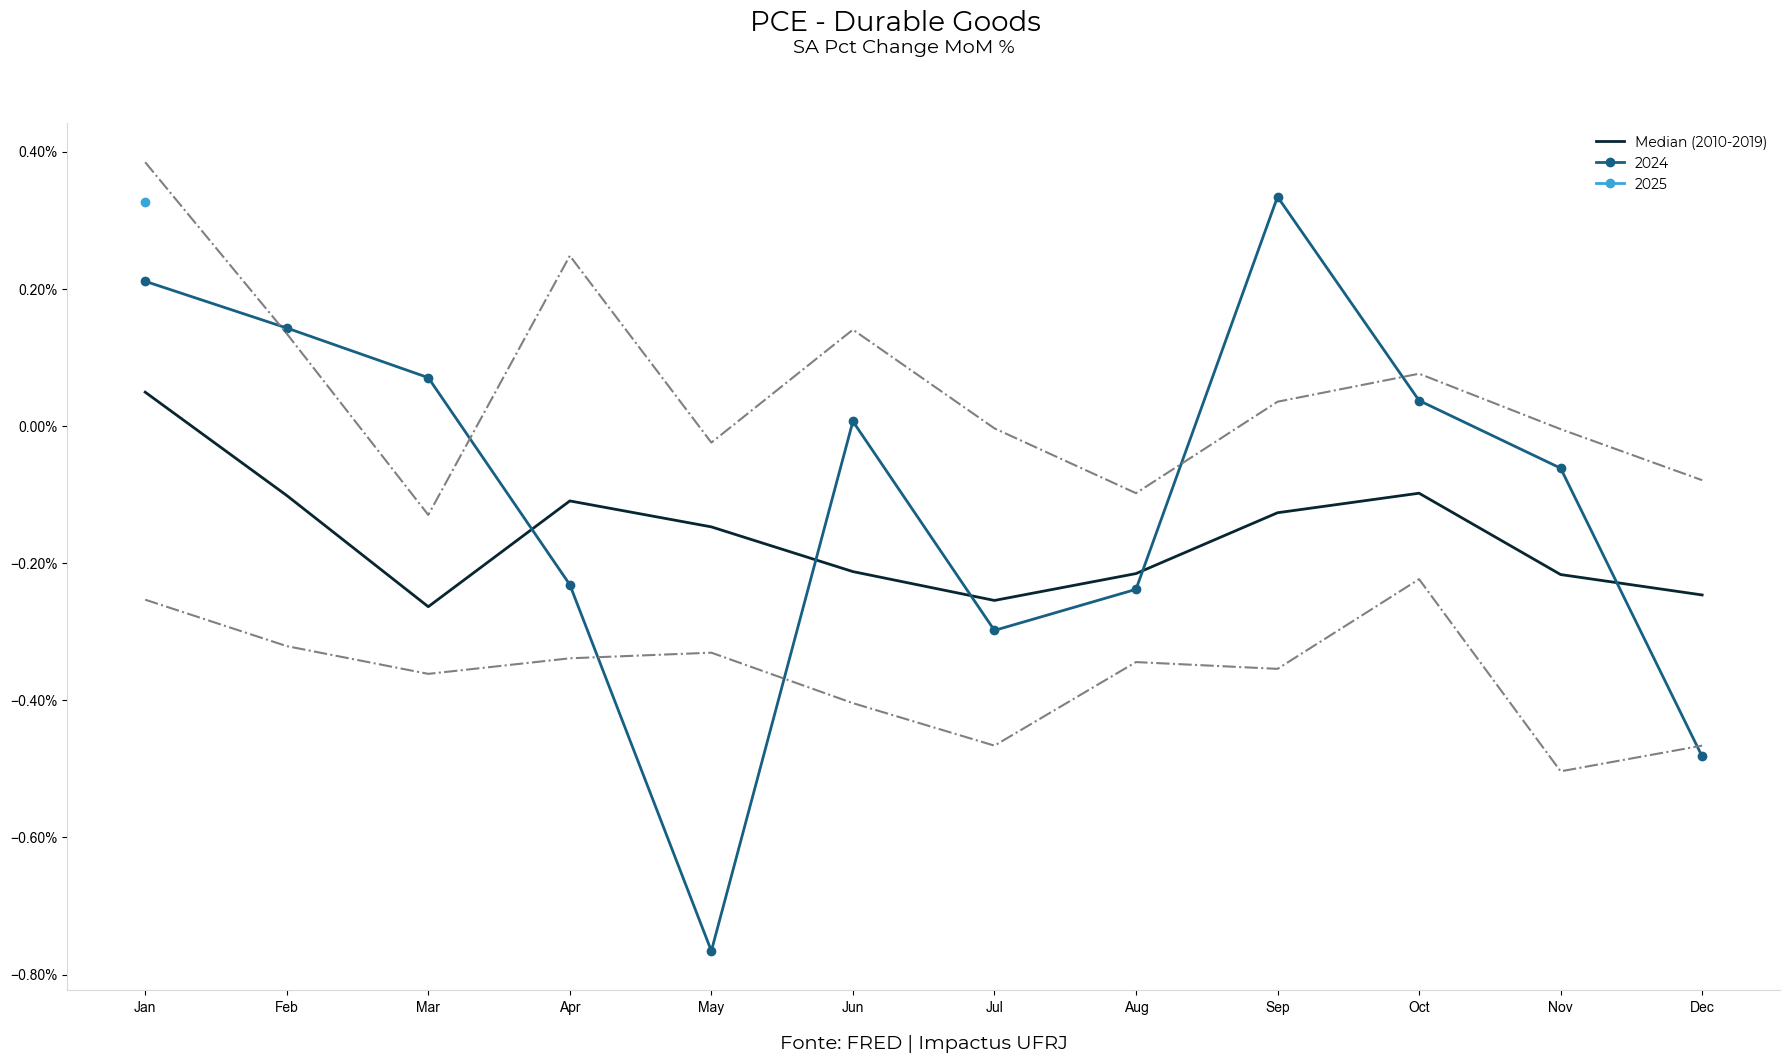

In [18]:
# agora bens duráveis

durable = fred.get_series("DDURRG3M086SBEA")
pce_durable = pd.DataFrame()
pce_durable["Pct Change"] = pd.DataFrame(durable).pct_change()
pce_durable["Pct Change from a year ago"] = pd.DataFrame(durable).pct_change(periods=12)
durable_graph_values_ya = pce_durable[(pce_durable.index.year >= 2009)]

#Vou pegar limites 90 e 10
pce_pctchg_2024_durable = pce_durable[pce_durable.index.year == 2024].groupby(pce_durable[pce_durable.index.year == 2024].index.month)["Pct Change"].first()
pce_pctchg_2025_durable = pce_durable[pce_durable.index.year == 2025].groupby(pce_durable[pce_durable.index.year == 2025].index.month)["Pct Change"].first()
pce_durable = pce_durable[(pce_durable.index.year >= 2010) & (pce_durable.index.year <= 2019)]
percentil_10_pctchg_durable = pce_durable.groupby(pce_durable.index.month)["Pct Change"].quantile(0.10)
percentil_90_pctchg_durable = pce_durable.groupby(pce_durable.index.month)["Pct Change"].quantile(0.90)
mediana_pctchg_durable = pce_durable.groupby(pce_durable.index.month)["Pct Change"].median()

durable_graph_values = pd.DataFrame({
    "Percentil 10": percentil_10_pctchg_durable,
    "Percentil 90": percentil_90_pctchg_durable,
    "Ano de 2024": pce_pctchg_2024_durable,
    "Ano de 2025": pce_pctchg_2025_durable,
    "Mediana": mediana_pctchg_durable
})

durable_graph_values.index = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.figure(figsize=(18, 10.8))

plt.plot(durable_graph_values.index, durable_graph_values["Mediana"], linewidth=2, color="#082631", label="Median (2010-2019)")
plt.plot(durable_graph_values.index, durable_graph_values["Ano de 2024"], marker="o", linewidth=2, color="#166083", label="2024")
plt.plot(durable_graph_values.index, durable_graph_values["Ano de 2025"], marker="o", linewidth=2, color="#37A6D9", label="2025")
plt.plot(durable_graph_values.index, durable_graph_values["Percentil 10"], color="grey", ls= "-.")
plt.plot(durable_graph_values.index, durable_graph_values["Percentil 90"], color="grey", ls= "-.")
plt.suptitle("PCE - Durable Goods", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "SA Pct Change MoM %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

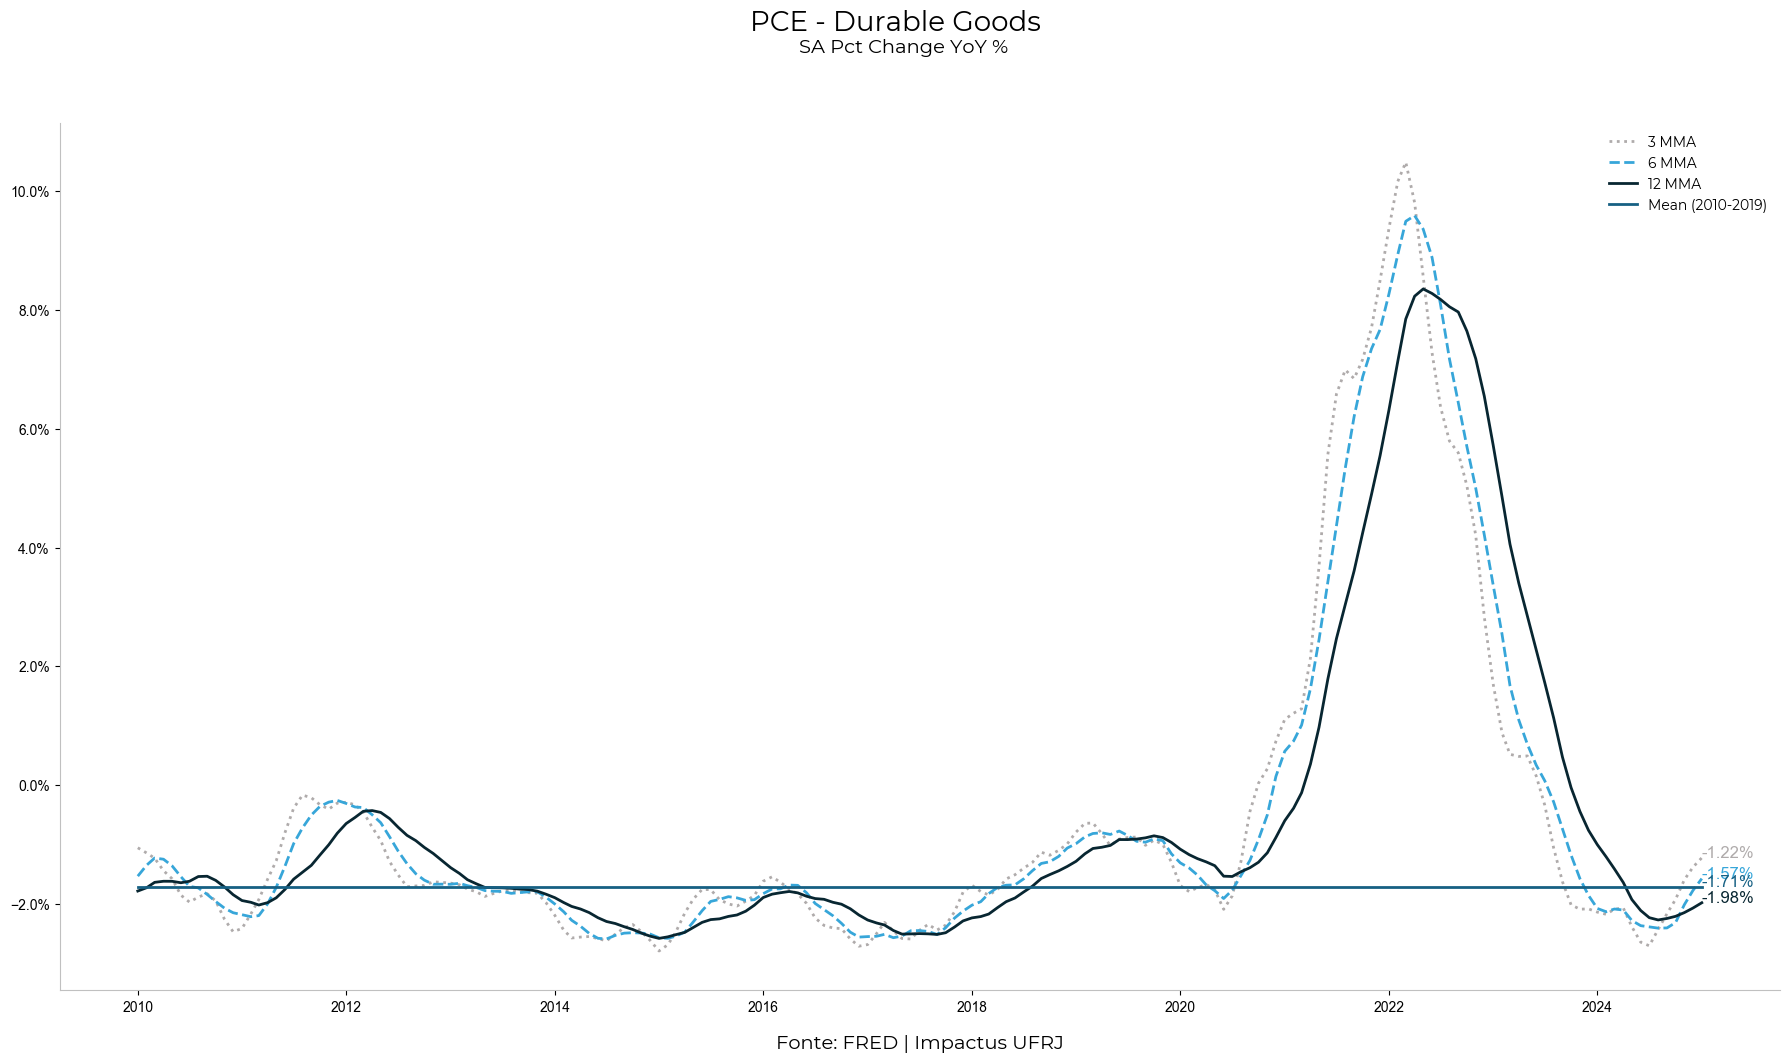

In [19]:
# agora durable yoy

mma3_durable = durable_graph_values_ya["Pct Change from a year ago"].rolling(window=3).mean()
mma12_durable = durable_graph_values_ya["Pct Change from a year ago"].rolling(window=12).mean()
mma6_durable = durable_graph_values_ya["Pct Change from a year ago"].rolling(window=6).mean()
mean_10_19_durable = pce_durable[(pce_durable.index.year >= 2010) & (pce_durable.index.year <= 2019)]["Pct Change from a year ago"].mean()

durable_ya = pd.DataFrame({
    "MMA3": mma3_durable,
    "MMA6": mma6_durable,
    "MMA12": mma12_durable,
    "Mean 2010-2019": mean_10_19_durable
})

durable_ya.dropna(inplace=True)
durable_ya = durable_ya.drop(durable_ya.index[0])

plt.figure(figsize=(18, 10.8))

plt.plot(durable_ya.index, durable_ya["MMA3"], linewidth=2, color="#AFABAB", label="3 MMA", ls= ":")
plt.plot(durable_ya.index, durable_ya["MMA6"], linewidth=2, color="#37A6D9", label="6 MMA", ls= "--")
plt.plot(durable_ya.index, durable_ya["MMA12"], linewidth=2, color="#082631", label="12 MMA")
plt.plot(durable_ya.index, durable_ya["Mean 2010-2019"], linewidth=2, color="#166083", label="Mean (2010-2019)")

plt.suptitle("PCE - Durable Goods", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "SA Pct Change YoY %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#c0c0c0")
plt.gca().spines["bottom"].set_color("#c0c0c0")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

plt.text(durable_ya.index[-1], durable_ya["MMA3"].iloc[-1], f'{durable_ya["MMA3"].iloc[-1]:.2%}', color="#AFABAB", fontsize=12, ha='left')
plt.text(durable_ya.index[-1], durable_ya["MMA6"].iloc[-1], f'{durable_ya["MMA6"].iloc[-1]:.2%}', color="#37A6D9", fontsize=12, ha='left')
plt.text(durable_ya.index[-1], durable_ya["MMA12"].iloc[-1], f'{durable_ya["MMA12"].iloc[-1]:.2%}', color="#082631", fontsize=12, ha='left')
plt.text(durable_ya.index[-1], durable_ya["Mean 2010-2019"].iloc[-1], f'{durable_ya["Mean 2010-2019"].iloc[-1]:.2%}', color="#166083", fontsize=12, ha='left')

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()

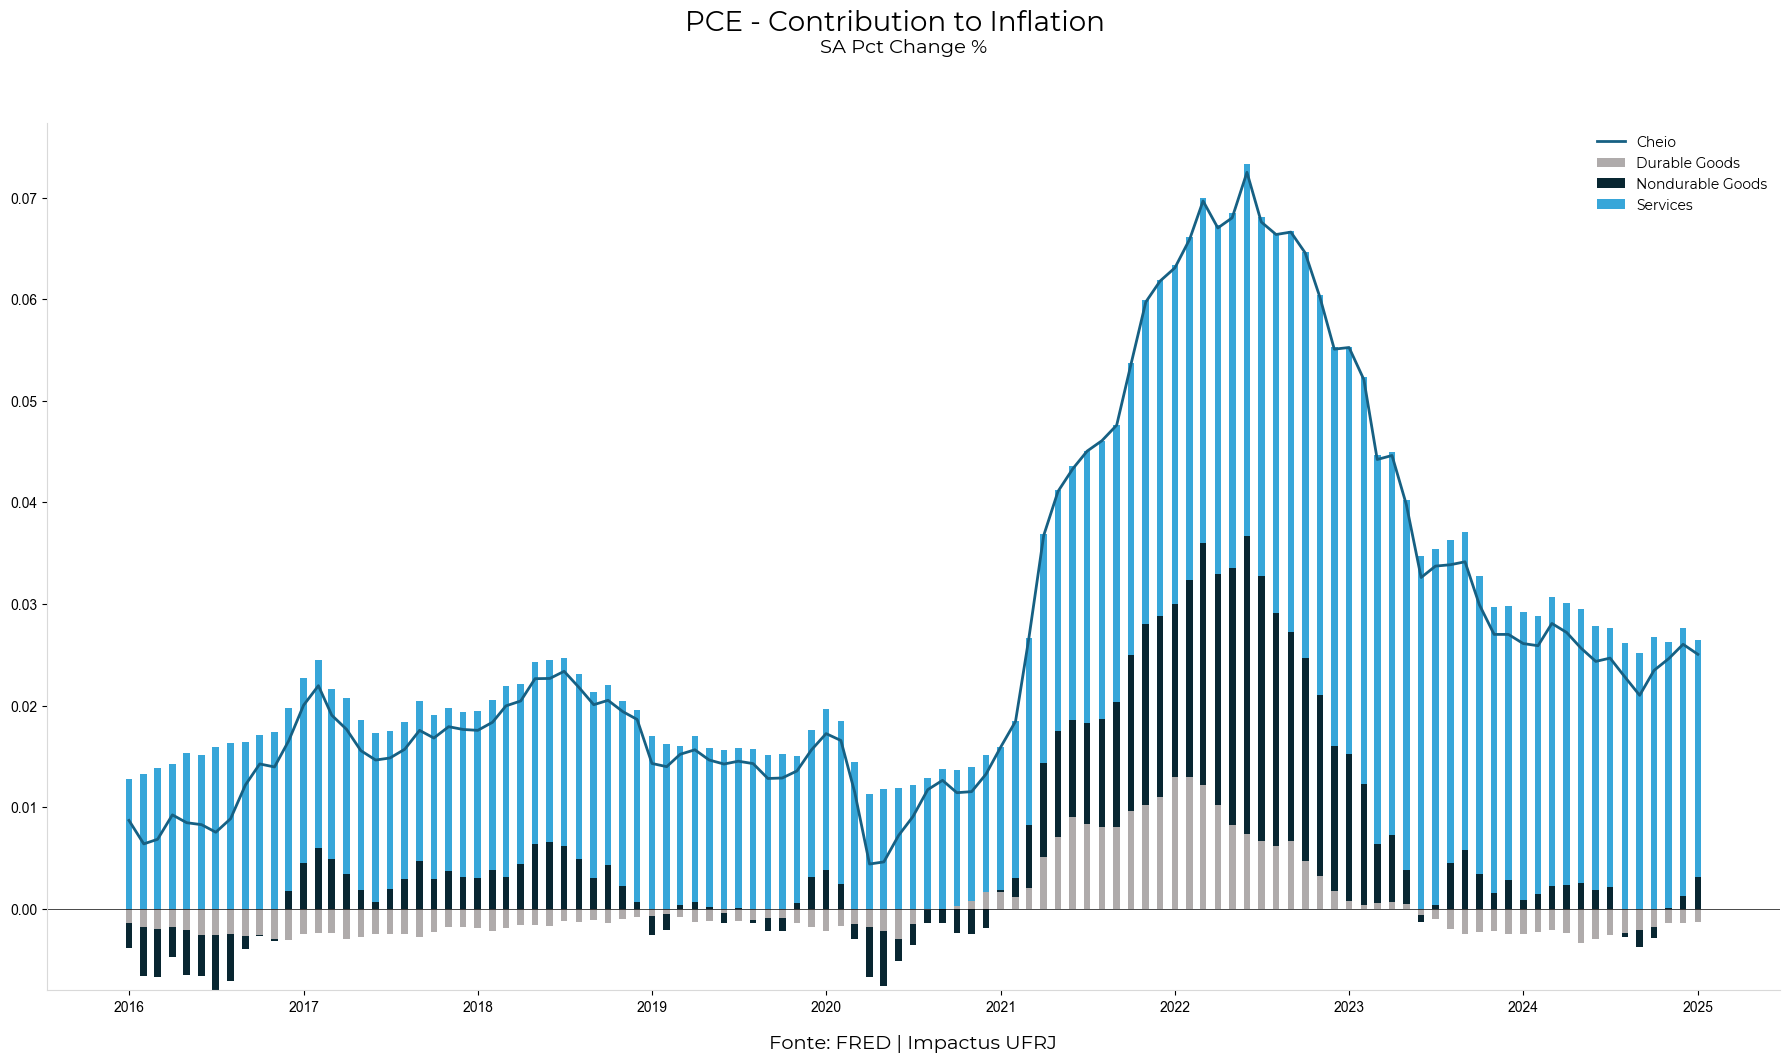

In [20]:
#Refazer a porra da contribuição

data_pce = fred.get_series("PCE")
data_ngoods = fred.get_series("PCEND")
data_dgoods = fred.get_series("PCEDG")
data_services = fred.get_series("PCES")

pce = pd.DataFrame()
pce["PCE"] = pd.DataFrame(data_pce)
pce["Nondurable Goods"] = pd.DataFrame(data_ngoods)
pce["Durable Goods"] = pd.DataFrame(data_dgoods)
pce["Services"] = pd.DataFrame(data_services)

proporcao = pd.DataFrame()
proporcao["Nondurable Goods"] = pce["Nondurable Goods"] / pce["PCE"]
proporcao["Durable Goods"] = pce["Durable Goods"] / pce["PCE"]
proporcao["Services"] = pce["Services"] / pce["PCE"]

proporcao = proporcao[(proporcao.index.year >= 2016)]

dgood = fred.get_series("DDURRG3M086SBEA")
ngood = fred.get_series("DNDGRG3M086SBEA")
serv = fred.get_series("DSERRG3M086SBEA")
cheio = fred.get_series("PCEPI")

inflation = pd.DataFrame()
inflation["Durable Goods"] = pd.DataFrame(dgood).pct_change(periods=12)
inflation["Nondurable Goods"] = pd.DataFrame(ngood).pct_change(periods=12)
inflation["Services"] = pd.DataFrame(serv).pct_change(periods=12)
inflation["Cheio"] = pd.DataFrame(cheio).pct_change(periods=12)

inflation = inflation[(inflation.index.year >= 2016)]

contribuicao = pd.DataFrame()
contribuicao["Durable Goods"] = proporcao["Durable Goods"] * inflation["Durable Goods"]
contribuicao["Nondurable Goods"] = proporcao["Nondurable Goods"] * inflation["Nondurable Goods"]
contribuicao["Services"] = proporcao["Services"] * inflation["Services"]

contribuicao = contribuicao[(contribuicao.index.year >= 2016)]

contribuicao_positive = contribuicao.clip(lower=0)
contribuicao_negative = contribuicao.clip(upper=0)

plt.figure(figsize=(18, 10.8))

plt.bar(contribuicao.index, contribuicao_positive["Durable Goods"], color="#AFABAB", label="Durable Goods", width=14)
plt.bar(contribuicao.index, contribuicao_negative["Durable Goods"], color="#AFABAB", width=14)

plt.bar(contribuicao.index, contribuicao_positive["Nondurable Goods"], bottom=contribuicao_positive["Durable Goods"], color="#082631", label="Nondurable Goods", width=14)
plt.bar(contribuicao.index, contribuicao_negative["Nondurable Goods"], bottom=contribuicao_negative["Durable Goods"], color="#082631", width=14)

plt.bar(contribuicao.index, contribuicao_positive["Services"], bottom=contribuicao_positive["Durable Goods"] + contribuicao_positive["Nondurable Goods"], color="#37A6D9", label="Services", width=14)
plt.bar(contribuicao.index, contribuicao_negative["Services"], bottom=contribuicao_negative["Durable Goods"] + contribuicao_negative["Nondurable Goods"], color="#37A6D9", width=14)

plt.plot(contribuicao.index, inflation["Cheio"], color="#166083", label="Cheio", linewidth=2)

plt.suptitle("PCE - Contribution to Inflation", fontsize=20, fontweight='bold', fontproperties=font_prop)
plt.text(0.505, 0.94, "SA Pct Change %", fontsize=14, fontproperties=font_prop, ha='center', transform=plt.gcf().transFigure)
plt.legend(frameon=False, fontsize=14, prop=font_prop, loc="upper right")
plt.axhline(y=0, color='black', linewidth=0.5)

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#d9d9d9")
plt.gca().spines["bottom"].set_color("#d9d9d9")

plt.xlabel("Fonte: FRED | Impactus UFRJ", fontsize=14, labelpad=15, fontproperties=font_prop)
plt.tight_layout()
plt.show()
